# Aprendizaje Automático - Práctica 2 - Experimentación con agrupamiento y detección de anomalías  no supervisada

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 19 de Mayo de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>ELENA TORRES FERNÁNDEZ</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, tres Notebooks de Colab (uno con cada ejercicio). No es necesario entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

## <font color='blue'>Ejercicio 1: OPTIMIZANDO k-MEANS y DBSCAN (4 puntos)</font>

<font color='blue'>La optimización de algoritmos de clustering como k-Means y DBSCAN en aprendizaje automático es fundamental para abordar aplicaciones reales debido a varias razones críticas. Primero, estas técnicas son ampliamente aplicadas en la segmentación de clientes, detección de anomalías, sistemas de recomendación, y otras áreas donde la agrupación efectiva de datos es crucial para extraer _insights_ significativos y tomar decisiones informadas. Optimizar estos algoritmos permite manejar grandes volúmenes de datos de manera eficiente, mejorando la velocidad y reduciendo los costos computacionales, lo cual es esencial en entornos donde el tiempo y los recursos son limitados. Además, al afinar estos métodos para incrementar su precisión y sensibilidad, se pueden identificar patrones y tendencias con mayor exactitud, lo que resulta en modelos más robustos y confiables. En un mundo donde los datos crecen exponencialmente, la capacidad de procesar y analizar esta información de manera efectiva es clave para el éxito en diversas aplicaciones prácticas, haciendo de la optimización y uso (incluso como parte de estrategias complejas de entrenamiento) de algoritmos de _clustering_ un componente indispensable en el campo del _machine learning_.

<font color='blue'>En este ejercicio intentaremos profundizar un poco en cómo optimizar y operar con dos algoritmos de clustering básicos (k-Means y DBSCAN).



---




<font color='blue'>Primero, importamos las librerías necesarias y fijamos la semilla aleatoria para que nuestros resultados sean reproducibles entre ejecuciones.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Fijamos la semilla aleatoria
np.random.seed(42) #¿Por qué 42? https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy

# Cambiamos aspecto de los gráficos
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)





---






### <font color='blue'>Ejercicio 1.A: Optimizando k-Means (3 puntos)</font>

<font color='blue'> Vamos a entrenar un agrupador K-Means en un conjunto de datos sintético en 2D, y vamos a intentar encontrar el centro de cada mancha y asignar cada instancia a la mancha/agrupación más cercana. Las tareas concretas a realizar en este ejercicio se resumen a continuación:
1.   Completamos el código con el ajuste de un `KMeans` usando 5 clusters y el hiperparámetro `n_init` con un valor igual a 1. Este hiperparámetro nos dice el número de veces que se ejecuta el algoritmo k-means con diferentes semillas de centroide (inicializaciones aleatorias). El resultado final es el mejor resultado de `n_init` ejecuciones consecutivas en términos de inercia. En general, suele ser recomendable emplear varias ejecuciones (especialmente, en problemas con alta dimensionalidad).
2.   Cada instancia se asignará a uno de los cinco clusters. En el contexto del clustering, la etiqueta de una instancia es el índice del cluster al que el algoritmo asigna esta instancia; esto no debe confundirse con las etiquetas de clase en clasificación, que se utilizan como objetivos. La instancia `KMeans` conserva las etiquetas predichas de las instancias con las que se entrenó, disponibles a través de la variable de instancia `labels_`. Imprimimos los centros de los 5 clusters y dibujamos los bordes de decisión de los 5 clusters obtenidos.
3. Predecimos cuatro nuevas instancias con valores `[[0, 2], [3, 2], [-3, 3], [-3, 2.5]]` utilizando el enfoque de clustering duro (`predict`) y clustering flexible (`transform`). En el primer caso, se proporciona uno de los clusters como aquel al que pertenece la instancia bajo estudio (es decir, cada instancia se asume que pertenece a un único cluster). En el segundo, se recupera un valor de pertenencia difuso/parcial de la instancia a cada uno de los clusters (es decir, cada instancia tiene un cierto grado de pertenencia a cada uno de los clusters).
4. A continuación, vamos a ver de qué forma influye la inicialización de los centroides en el resultado final. Vamos a escoger, de forma aproximada, dónde se pueden poner los 5 centroides para comenzar a iterar con un k-means. Para ello se puede lanzar `KMeans` con el hiperparámetro `n_init=1` y el hiperparámetro `init` con un `np.array` de 5 puntos en 2D escogidos manualmente por el estudiante. Prueba qué ocurre en este caso, imprimiendo los centros y dibujando los bordes de decisión de los 5 clusters obtenidos.
5. En la mayoría de casos reales y de interés, no es viable saber dónde están los centroides, pues los datos son más complejos. Para estos casos, el hiperpárametro `n_init` tiene un valor por defecto de 10; lo que significa que todo el algoritmo se ejecuta 10 veces cuando se llama a `fit()`, y Scikit-Learn se queda con la mejor solución. Pero, ¿cómo sabe exactamente qué solución es la mejor? Utiliza una métrica de rendimiento. Esa métrica se llama inercia del modelo, que es la suma de las distancias al cuadrado entre las instancias y sus centroides más cercanos. La clase `KMeans` ejecuta el algoritmo `n_init` veces y se queda con el modelo con la inercia más baja. La inercia de un modelo es accesible a través de la variable de instancia `inertia_`. El método `score()` devuelve la inercia negativa. ¿Por qué crees que devuelve el valor negativo? Imprime los valores `inertia_` y `score()` obtenidos en el apartado anterior.
6. Prueba diferentes métodos de inicialización (hiperparámetro `init`) y diferentes variantes de k-Medias con el hiperparámetro `algorithm`. Describe cada método de inicialización y compara gráficamente el resultado. ¿Notas diferencias significativas en las figuras representadas? ¿Por qué?
7. Vamos a encontrar el número óptimo de clusters utilizando el silhouette score, que lo podéis encontrar en `sklearn.metrics` importando `silhouette_score`.  Vamos a visualizar  este score para diferente número de clusters, desde 2 hasta 15  (ambos inclusive): eje X (número de clusters) vs eje Y (silhouette score).  Aquí utilizaremos el valor `n_init=10`. Analiza los resultados obtenidos.
8. Se puede obtener una visualización aún más informativa si representamos el coeficiente
de silueta de cada instancia, ordenado por los clusters a los que está asignada y
por el valor del coeficiente. Esto se denomina diagrama de siluetas
(véase https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).
Cada diagrama contiene una forma de cuchillo por cluster. La altura de la forma indica el número
de instancias en el cluster, y su anchura representa los coeficientes de silueta
ordenados de las instancias en el cluster (más ancho es mejor). Dibuja los
coeficientes de silueta para un $k=\{3,4,5,6\}$ y analiza los resultados obtenidos.
9. El conjunto de datos clásico de Olivetti contiene 400 imágenes de rostros en escala
de grises de 64×64 píxeles. Cada imagen se aplana a un vector 1D de tamaño 4.096.
Se fotografiaron 40 personas diferentes (10 veces cada una), y la tarea habitual es
entrenar un modelo que pueda predecir qué persona está representada en cada imagen.
Carga el conjunto de datos utilizando la función `sklearn.datasets.fetch_olivetti_faces()`
y, a continuación, divídelo en un conjunto de entrenamiento y
unode test (ten en cuenta que el conjunto de datos ya está escalado entre 0 y 1).
Dado que el conjunto de datos es bastante pequeño, probablemente necesitaremos utilizar un muestreo
estratificado (`StratifiedShuffleSplit`) para asegurarnos de que hay el mismo número de imágenes por persona/clase/cluster en cada conjunto.
A continuación, agrupa las imágenes utilizando tres modelos de k-means (k-means++ con `n_init=10`,
random con `n_init=1`, y random con `n_init=10` y el algoritmo ` elkan` para agilizar cómputo), y
asegúrate de que empleamos un buen número de clústers (utilizando técnicas de los apartados anteriores).
Visualiza los clusters utilizando el mejor modelo (bajo tu criterio, que debes justificar) de los tres previos: ¿ves caras
similares en cada cluster? Es decir, ¿hemos sido capaces de agrupar rostros de las mismas personas de forma no supervisada? ¿Cómo de buenas son las predicciones realizadas con el conjunto de test: se corresponden adecuadamente con las identidades de entrenamiento?
¿Qué conclusiones extraes en base al trabajo realizado y los resultados obtenidos?
NOTA: Puedes utilizar reducción de dimensionalidad para agilizar el cómputo.

<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas.

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blobs_c = np.array([[ 0,  2.5], [-1.5 ,  2.3], [-2.8,  1.7],
                         [-2.6,  3.5], [-2.9,  1.4]])
blob_std = np.array([0.45, 0.25, 0.1, 0.1, 0.05])
X, y = make_blobs(n_samples=2000, centers=blobs_c, cluster_std=blob_std,
                  random_state=42)

<font color='blue'> Dibujamos las manchas.

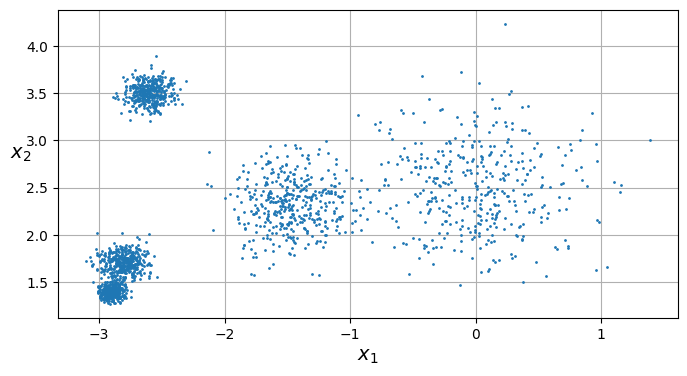

In [3]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [4]:
# Apartado 1
k = 5

# creamos el agrupador K-Means
kmeans = KMeans(n_clusters=k, init='random', n_init=1, algorithm='lloyd').fit(X)

En el apartado 1 se ha creado un clusterer k-means con unos parámetros específicos. A continuación, voy a explicar el <b>funcionamiento del agrupador K-Means</b> y cuáles son sus <b>parámetros</b> con los que podemos jugar para tratar de optimizarlo en este problema.

El algoritmo k-means es uno de los clusterer más rápidos y sencillos. Parte de la inicialización de <b>k</b> centroides, ya sea de forma aleatoria eligiendo puntos al azar dentro de nuestro conjunto de datos (<b>init='random'</b>) o de forma más "inteligente" tratando de coger el siguiente centroide lo más alejado del escogido anteriormente (<b>init='k-means++'</b>). Posteriormente, se le asigna a cada instancia el centroide más cercano y se actualizan los valores de los centroides para que sean la media de las instancias que conforman su cluster. Estos últimos dos pasos se repiten hasta convergencia, es decir, hasta que los centroides dejen de moverse o la diferencia respecto a la iteración anterior sea menor que una tolerancia dada.

Este proceso se puede ejecutar solo una vez (<b>n_init=1</b>), varias veces o dejar que scikit-kearn determine las iteraciones de forma automática (<b>init='auto'</b>). En caso de ejecutarse varias veces, se realiza el mismo proceso explicado en el párrafo anterior partiendo de diferentes semillas aleatorias cada vez y se elige como solución final la de menor inercia.

La <b>inercia</b> es la suma de las distancias al cuadrado entre las todas las instancias y sus centroides más cercanos. Nos interesa que este valor sea pequeño, pues buscamos minimizar la distancia intra-cluster, pero, tampoco queremos minimizarla al máximo, sino buscar un equilibrio entre k y la inercia, como veremos más adelante.

A la hora de calcular estas distancias, el método KMeans de scikit-learn propone dos formas posibles: <b>lloyd algorithm</b>, el tradicional; y <b>elkan algorithm</b>, el cual busca acelerar el cálculo de las distancias aprovechándose de la desigualdad triangular, a costa de gastar más memoria.

También cabe destacar algunos de los <b>atributos</b> con los que cuenta el método k-means en scikit-learn: <b>cluster_centers_,</b> un array de k elementos que contiene las coordenadas de los centroides; <b>labels_</b>, un array con las etiquetas que proporciona el modelo para cada ejemplo del conjunto de datos; <b>inertia_</b>, el valor de la inercia para este clusterer...

En concreto, en el <b>apartado 1</b> se ha creado un agrupador con 5 clusterers inicializados de forma aleatoria que ha agrupado cada instancia siguiendo el algoritmo original 'lloyd'. Este algoritmo sólo se ha ejecutado 1 vez. Inmediatamente después de crear el clusterer se ha ajustado a nuestros datos de entrenamiento <i>X</i>.

Una vez entrenado el agrupador, en el <b>apartado 2</b>, hacemos uso de su atributo <i>cluster_centers_</i> y las funciones definidas por los profesores, <i>plot_centroids</i> y <i>plot_decision_boundaries</i>, para representar el gráfico con los bordes de decisión y los centroides que ha determinado el modelo en este problema.

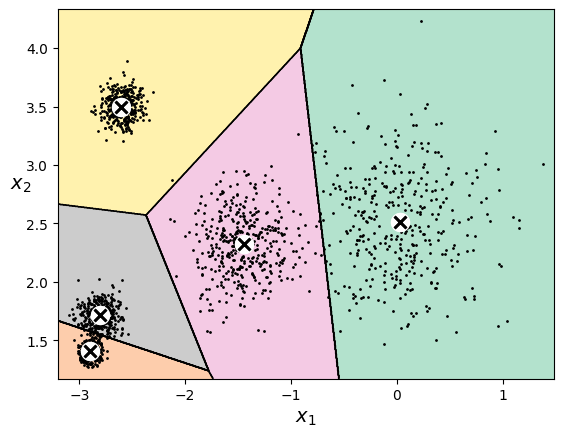

In [5]:
#Apartado 2

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

# Imprimimos los centros de los 5 clusters
# (aunque ya se están imprimiendo en el plot_decision_boundaries por defecto)
plot_centroids(kmeans.cluster_centers_)

# Dibujamos los bordes de decisión de los 5 clusters obtenidos
plot_decision_boundaries(kmeans, X)

Viendo el <b>gráfico de bordes de decisión</b>, observamos que el clusterer creado agrupa bastante bien los 5 grupos. O por lo menos, como seres humanos, también hubiéramos colocado los <b>centroides</b> en esas posiciones. En el siguiente apartado ponemos a prueba nuestro modelo con nuevos datos de test.

In [6]:
#Apartado 3

# 4 nuevas instancias
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

# Predecimos los clusters a los que pertenece cada instancia con predict (clustering duro)
print("Clustering duro (predict)")
labels = kmeans.predict(X_new)
for i in range(labels.size):
  print("Example: {0} - Cluster: {1}".format(X_new[i], labels[i]))

# Predecimos los clusters a los que pertenece cada instancia con transform (clustering flexible)
print("\nClustering flexible (transform)")
X_trans = kmeans.transform(X_new)
for i in range(labels.size):
  print("Example: {0} - Distances to the cluster centers: {1} - Nearest cluster: {2}".format(X_new[i], X_trans[i, :], np.argmin(X_trans[i, :])))

Clustering duro (predict)
Example: [0. 2.] - Cluster: 0
Example: [3. 2.] - Cluster: 0
Example: [-3.  3.] - Cluster: 3
Example: [-3.   2.5] - Cluster: 4

Clustering flexible (transform)
Example: [0. 2.] - Distances to the cluster centers: [0.51051303 2.95670679 1.48155255 3.00245465 2.81655042] - Nearest cluster: 0
Example: [3. 2.] - Distances to the cluster centers: [3.00972259 5.92609705 4.458112   5.79854651 5.80916178] - Nearest cluster: 0
Example: [-3.  3.] - Distances to the cluster centers: [3.07311208 1.59903566 1.69577387 0.63877213 1.29876591] - Nearest cluster: 3
Example: [-3.   2.5] - Distances to the cluster centers: [3.03371347 1.10057233 1.56379064 1.07572208 0.80819083] - Nearest cluster: 4


Hemos hecho la <b>predicción</b> de los nuevos datos de test de 2 formas diferentes que son análogas. Por un lado, llevamos a cabo un <b>clustering duro</b> usando la función predict del objeto kmeans, con la que se devuelve el único cluster al que pertenece cada nueva instancia según los bordes de decisión establecidos por el agrupador. Por otro lado, realizamos un <b>clustering flexible</b> mediante la función transform, con la que se devuelve un vector que contiene las distancias de cada nueva instancia a todos los centroides. Adicionalmente, he añadido el dato resultante de coger el cluster que representa el mínimo de estas distancias y, efectivamente, obtenemos las mismas predicciones que con el clustering duro.

En el <b>apartado 4</b>, creamos 2 agrupadores diferentes variando sólo la forma de inicializar los centroides. En este caso, los inicializamos de forma explícita pasándole como parámetro init un <b>vector de coordenadas de centroides</b> (esta forma no la había explicado arriba pero también es posible). Así, creamos 2 agrupadores: <b>kmeans41</b> y <b>kmeans42</b>, entre los cuales sólo varía la posición 'y' del segundo centroide en una unidad y el resto de centroides se inicializan de forma idéntica.

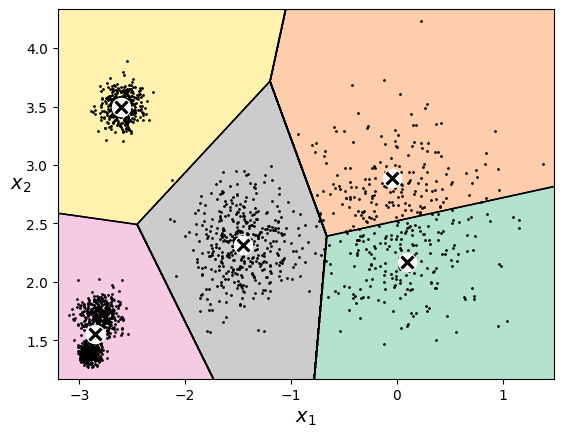

In [7]:
#Apartado 4 (versión 1)
k = 5
good_init = [[1.0, 1.0], [-1.0, 3.0], [-3.0, 2.5], [-2.0, 4.0], [-2.0, 0.5]]

# creamos el agrupador K-Means
kmeans41 = KMeans(n_clusters=k, init=good_init, n_init=1, algorithm='lloyd').fit(X)

# Imprimimos los centros de los 5 clusters
# (aunque ya se están imprimiendo en el plot_decision_boundaries por defecto)
plot_centroids(kmeans41.cluster_centers_)

# Dibujamos los bordes de decisión de los 5 clusters obtenidos
plot_decision_boundaries(kmeans41, X)

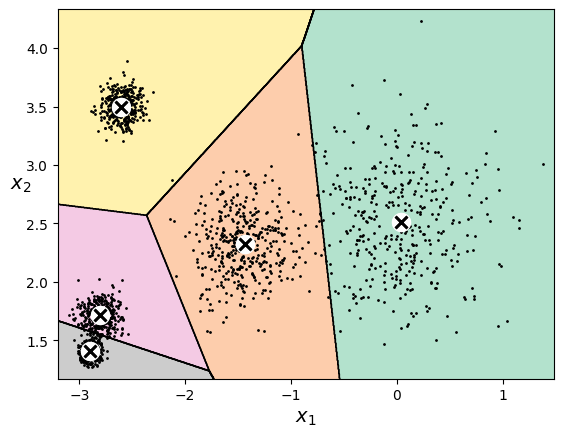

In [8]:
#Apartado 4 (versión 2)
k = 5
good_init = [[1.0, 1.0], [-1.0, 2.0], [-3.0, 2.5], [-2.0, 4.0], [-2.0, 0.5]]

# creamos el agrupador K-Means
kmeans42 = KMeans(n_clusters=k, init=good_init, n_init=1, algorithm='lloyd').fit(X)

# Imprimimos los centros de los 5 clusters
# (aunque ya se están imprimiendo en el plot_decision_boundaries por defecto)
plot_centroids(kmeans42.cluster_centers_)

# Dibujamos los bordes de decisión de los 5 clusters obtenidos
plot_decision_boundaries(kmeans42, X)

Comparando los gráficos de bordes de decisión que obtienen ambos agrupadores, vemos cómo <b>el segundo lo hace mejor que el primero</b>. kmeans41 considera toda la zona de la esquina izquierda inferior como un único cluster por la forma en que se han inicializado los centroides; mientras que el segundo sí los divide correctamente.

Corroborando la idea de que el primer agrupador es mejor que el segundo, en el <b>apartado 5</b> mostramos el valor de <b>inercia</b> de cada modelo, obteniendo un menor valor de inercia en el kmeans41 respecto al kmeans42, como estábamos intuyendo.

Otra forma de medir la inercia es mediante el método <b>score()</b>, el cual devuelve el valor negativo de inertia_. El score es negativo porque esta métrica hace referencia al <b>negativo de la función de verosimilitud</b> y scikit-learn busca siempre la convención de <u>maximizar</u> el logaritmo de la función de verosimilitud. Entonces, en este caso, como maximizar es disminuir la inercia, se pone en negativo para que una mejor inercia sea un mayor valor de score (y no menor).

Ahondando en la parte matemática, la <b>función de verosimilitud</b> es una función de los parámetros de un modelo estadístico que permite realizar inferencias acerca de su valor a partir de un conjunto de observaciones. En otras palabras, si tenemos un conjunto de datos y un modelo con ciertos parámetros, la verosimilitud nos dice qué tan probable es que el modelo con unos parámetros haya generado esos datos respecto a otros modelos con otros parámetros. Además, se usa el <b>logaritmo de la función de verosimilitud</b> porque las propiedades de los logaritmos simplifican mucho los cálculos en estas operaciones.

In [9]:
# Apartado 5

# Imprimimos la inertia_ y score() de los 2 modelos kmeans del apartado 4
print("Métrica modelo kmeans41:\n- Inercia: {0}\n- Score: {1}".format(kmeans41.inertia_, kmeans41.score(X)))
print("\nMétrica modelo kmeans42:\n- Inercia: {0}\n- Score: {1}".format(kmeans42.inertia_, kmeans42.score(X)))

Métrica modelo kmeans41:
- Inercia: 182.45140815154173
- Score: -182.45140815154173

Métrica modelo kmeans42:
- Inercia: 212.07061573657188
- Score: -212.07061573657188


En el <b>apartado 6</b>, comparamos diferentes agrupadores k-means variando los parámetros <i>init</i> y <i>algorithm</i>, dejando fijo <i>k=5</i>. Generamos 4 agrupadores y mostramos la gráfica de los bordes de decisión para cada uno.

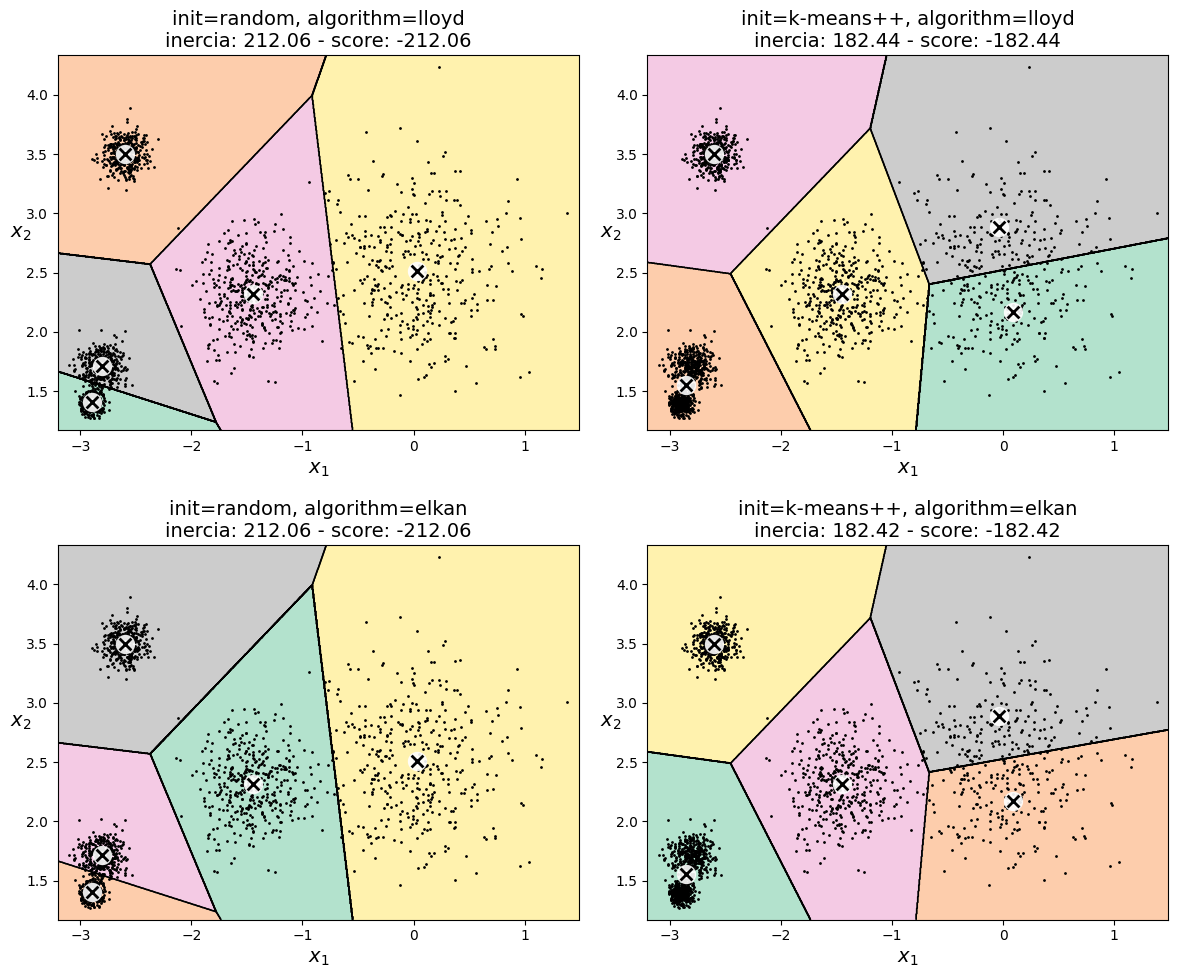

In [10]:
#Apartado 6
k = 5

# creamos el agrupador K-Means
kmeans61 = KMeans(n_clusters=k, init='random', n_init=1, algorithm='lloyd').fit(X)
kmeans62 = KMeans(n_clusters=k, init='k-means++', n_init=1, algorithm='lloyd').fit(X)
kmeans63 = KMeans(n_clusters=k, init='random', n_init=1, algorithm='elkan').fit(X)
kmeans64 = KMeans(n_clusters=k, init='k-means++', n_init=1, algorithm='elkan').fit(X)

# Mostramos gráficas
plt.figure(figsize=(12, 10))

ax = plt.subplot(2, 2, 1)
plt.title("init=random, algorithm=lloyd\ninercia: {:3.2f} - score: {:3.2f}".format(kmeans61.inertia_, kmeans61.score(X)))
plot_decision_boundaries(kmeans61, X)

ax = plt.subplot(2, 2, 2)
plt.title("init=k-means++, algorithm=lloyd\ninercia: {:3.2f} - score: {:3.2f}".format(kmeans62.inertia_, kmeans62.score(X)))
plot_decision_boundaries(kmeans62, X)

ax = plt.subplot(2, 2, 3)
plt.title("init=random, algorithm=elkan\ninercia: {:3.2f} - score: {:3.2f}".format(kmeans63.inertia_, kmeans63.score(X)))
plot_decision_boundaries(kmeans63, X)

ax = plt.subplot(2, 2, 4)
plt.title("init=k-means++, algorithm=elkan\ninercia: {:3.2f} - score: {:3.2f}".format(kmeans64.inertia_, kmeans64.score(X)))
plot_decision_boundaries(kmeans64, X)

plt.tight_layout()

En primer lugar, fijándonos en las gráficas nos damos cuenta de que <b>los agrupadores inicializados de forma aleatoria separan mejor el conjunto de datos frente a los k-means++</b>, pues no juntan la esquina izquierda inferior en un sólo cluster. Esto puede deberse a que el 'k-means++' evita que se creeen esos dos centroides tan cerca porque su inicialización da más probabilidad a que los centroides estén separados. Esto contradice a priori la idea de que la inicialización mediante 'k-means++' evita converger a soluciones subóptimas, pues aquí sí lo está haciendo. Aún así, es cierto que <b>con el k-means++ se obtienen menores valores de inercia</b>, pero esto no significa, como vemos, que el modelo sea mejor. Con esto nos damos cuenta de que aun sabiendo ciertos comportamientos para cada uno de los parámetros del clusterer KMeans, todo depende en última instancia de la estructura concreta de los datos con los que se está trabajando (distribución en el espacio, densidad, formas más o menos convexas...).

También nos damos cuenta de que, fijado el método de inicialización, <b>el tipo de algoritmo prácticamente no influye en los resultados obtenidos</b>, pues ambos obtienen casi el mismo valor de inercia y la misma gráfica. Con esto podemos sacar que los 2 algoritmos tienen comportamientos similares en cuanto a resultados y quizás la diferencia sólo está en el tiempo de ejecución. A mayor conjunto de datos, el algoritmo elkan va más rápido frente al lloyd, pero en este caso, no notamos la diferencia. Por todo esto, concluyo que el mejor modelo de los 4 expuestos anteriormente es el kmeans61.

En el <b>apartado 7</b>, fijamos los parámetros <i>init='random'</i>, <i>n_init=10</i> y <i>algorithm='lloyd'</i>, y variamos sólo <i>k</i> entre {3, 4, 5, 6} para tratar de <b>optimizar el número de clusters</b>. Ahora comparamos los agrupadores resultantes mediante la <b>puntuación de silueta media</b>. La puntuación de silueta media se calcula en scikit-learn mediante <b>silhouette_score</b> y cuantifica cuán similar es un objeto a su propio cluster (cohesión) en comparación con otros clusters (separación) en media. Por cada instancia, se calcula la distancia con todos los objetos de su cluster, la distancia con los objetos del cluster más cercano, el ratio entre ambas y luego, se hace la media entre todas las instancias. El valor de silueta está entre [-1,1]: un valor cercano a 1 indica que el objeto está bien emparejado con su propio cluster; cercano a 0, que está en una frontera entre clusters; y cercano a -1, que se ha clasificado erróneamente en otro cluster.

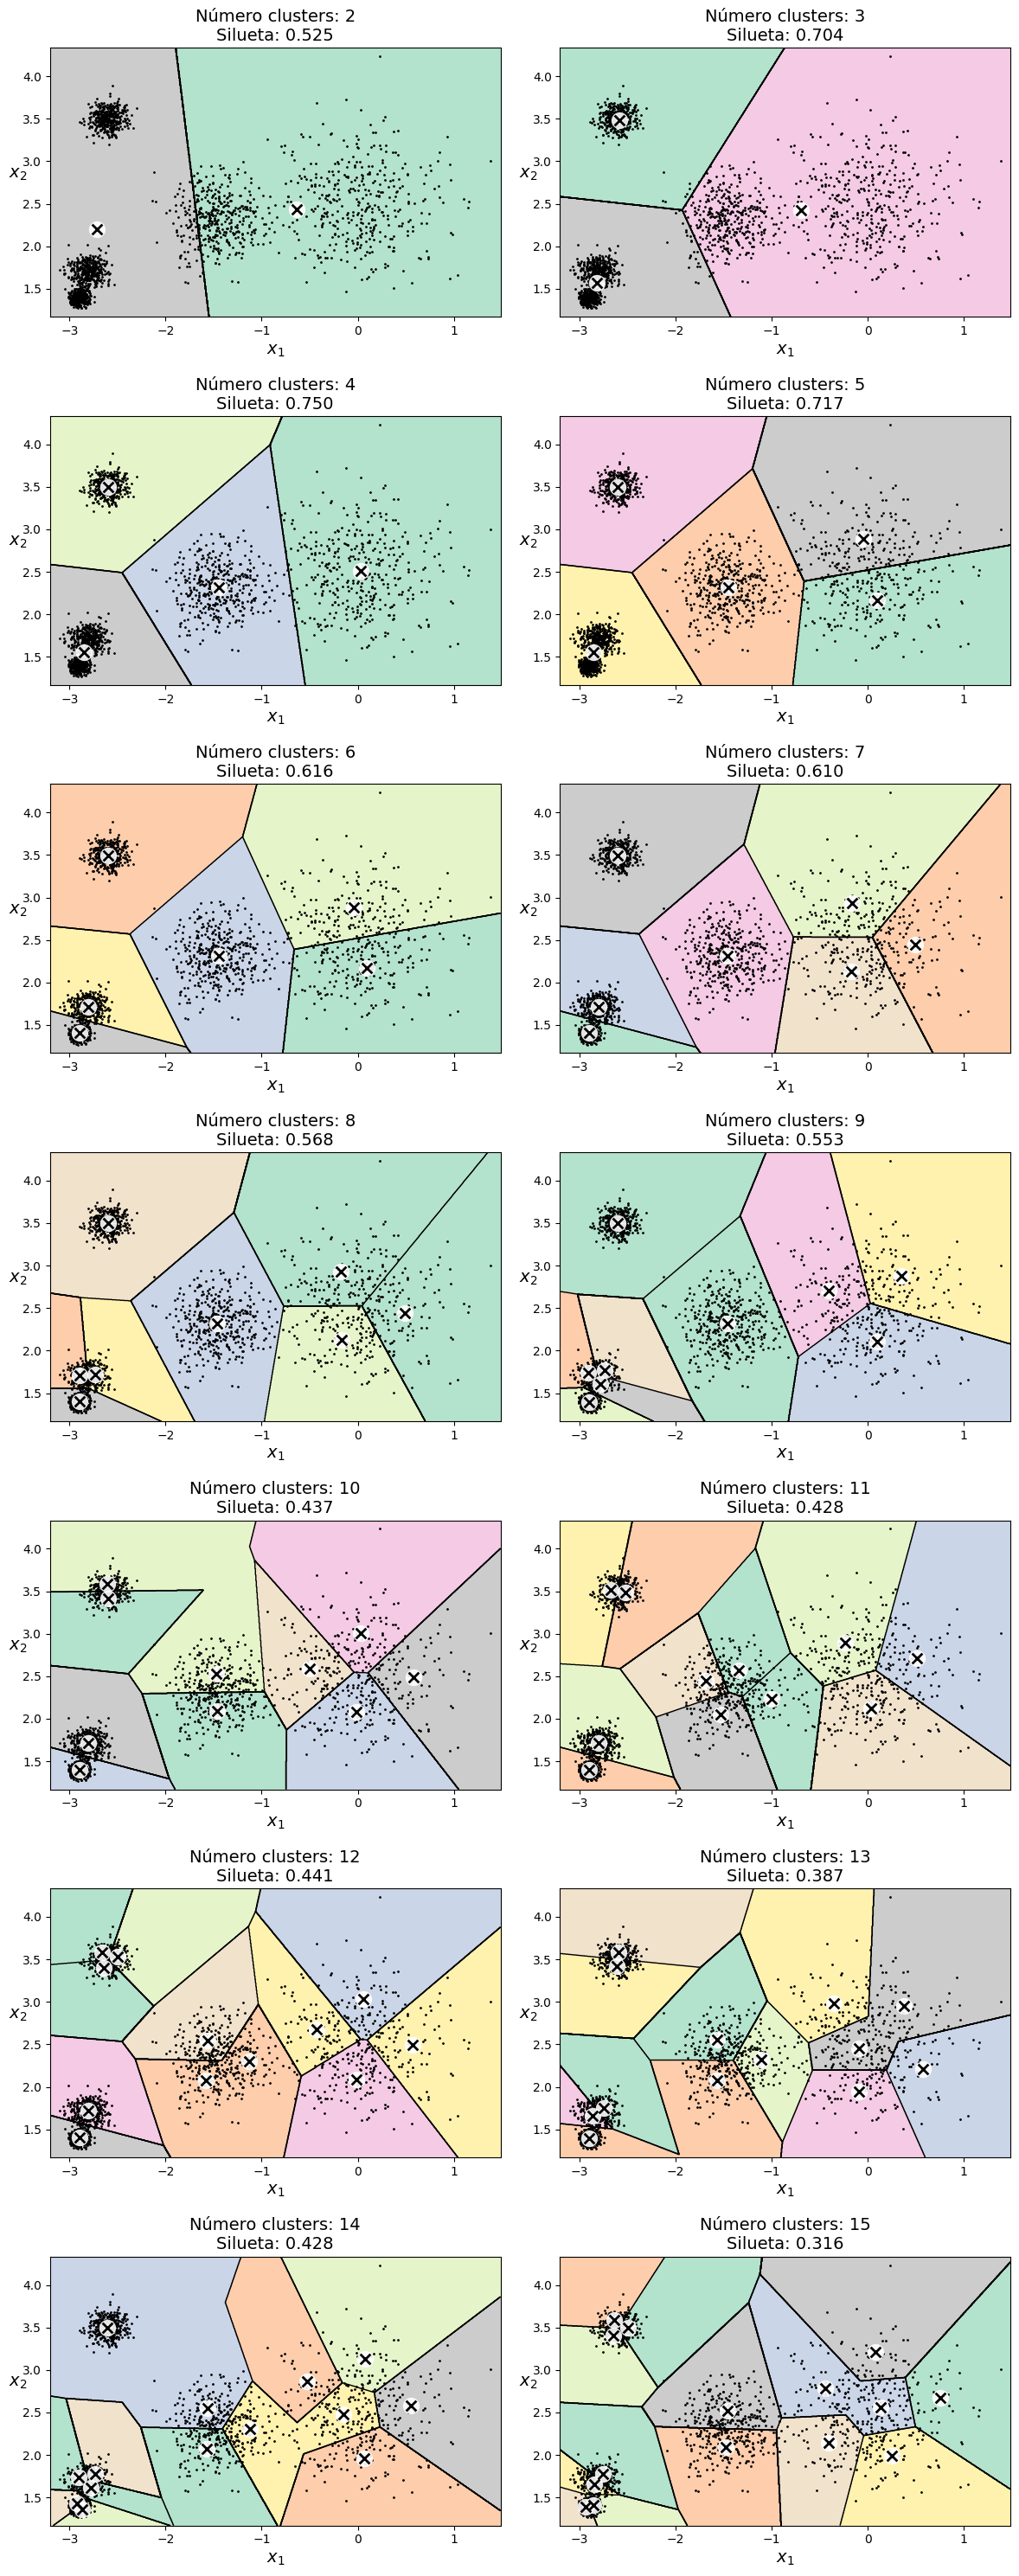

In [12]:
#Apartado 7
from sklearn.metrics import silhouette_score

plt.figure(figsize=(12, 30))
siluetas = []

# creamos un modelo para diferentes número de clusters
for i in range(2, 16):
  kmeans = KMeans(n_clusters=i, init='random', n_init=10, algorithm='lloyd')
  siluetas.append(silhouette_score(X, kmeans.fit_predict(X)))
  ax = plt.subplot(7, 2, i-1)
  plt.title("Número clusters: {}\nSilueta: {:1.3f}".format(i, siluetas[i-2]))
  plot_decision_boundaries(kmeans, X)

plt.tight_layout()

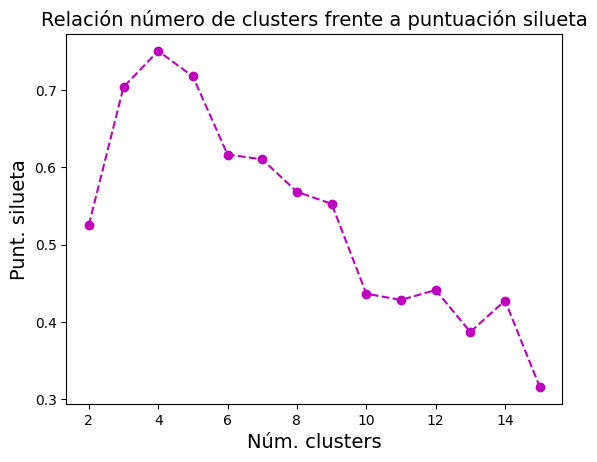

In [13]:
# Visualizamos las puntuaciones de silueta encontradas para cada modelo
plt.plot(range(2,16), siluetas, 'm--o')
plt.xlabel("Núm. clusters")
plt.ylabel("Punt. silueta")
plt.title("Relación número de clusters frente a puntuación silueta")
plt.show();

Viendo las gráficas anteriores, observamos que <b>el mayor valor de silueta se obtiene con 4 clusters</b>. No se obtiene con 5 clusters como cabía esperar porque en este modelo de 5 clusters con n_init=10, no se ha realizado correctamente la división de la esquina inferior izquierda, como sí se hacía bien cuando n_init=1. Esto nos demuestra que al tratarse de modelos aleatorios, aunque, en este caso, vayan mejor que otros modelos no aleatorios (como con init=k-means++), siempre va a haber pequeñas variaciones que impliquen obtener peores resultados en algunas ejecuciones.

En la gráfica de abajo se muestra la evolución de la puntuación de silueta media respecto al número de clusters. La diferencia entre k=4 y k=5 es mínima, después sí empieza a empeorar bastante. Para obtener más información sobre el número de clusters óptimo, y poder decantarnos entre k=4 o 5, en el <b>apartado 8</b> estudiamos los <b>diagramas de silueta</b>.

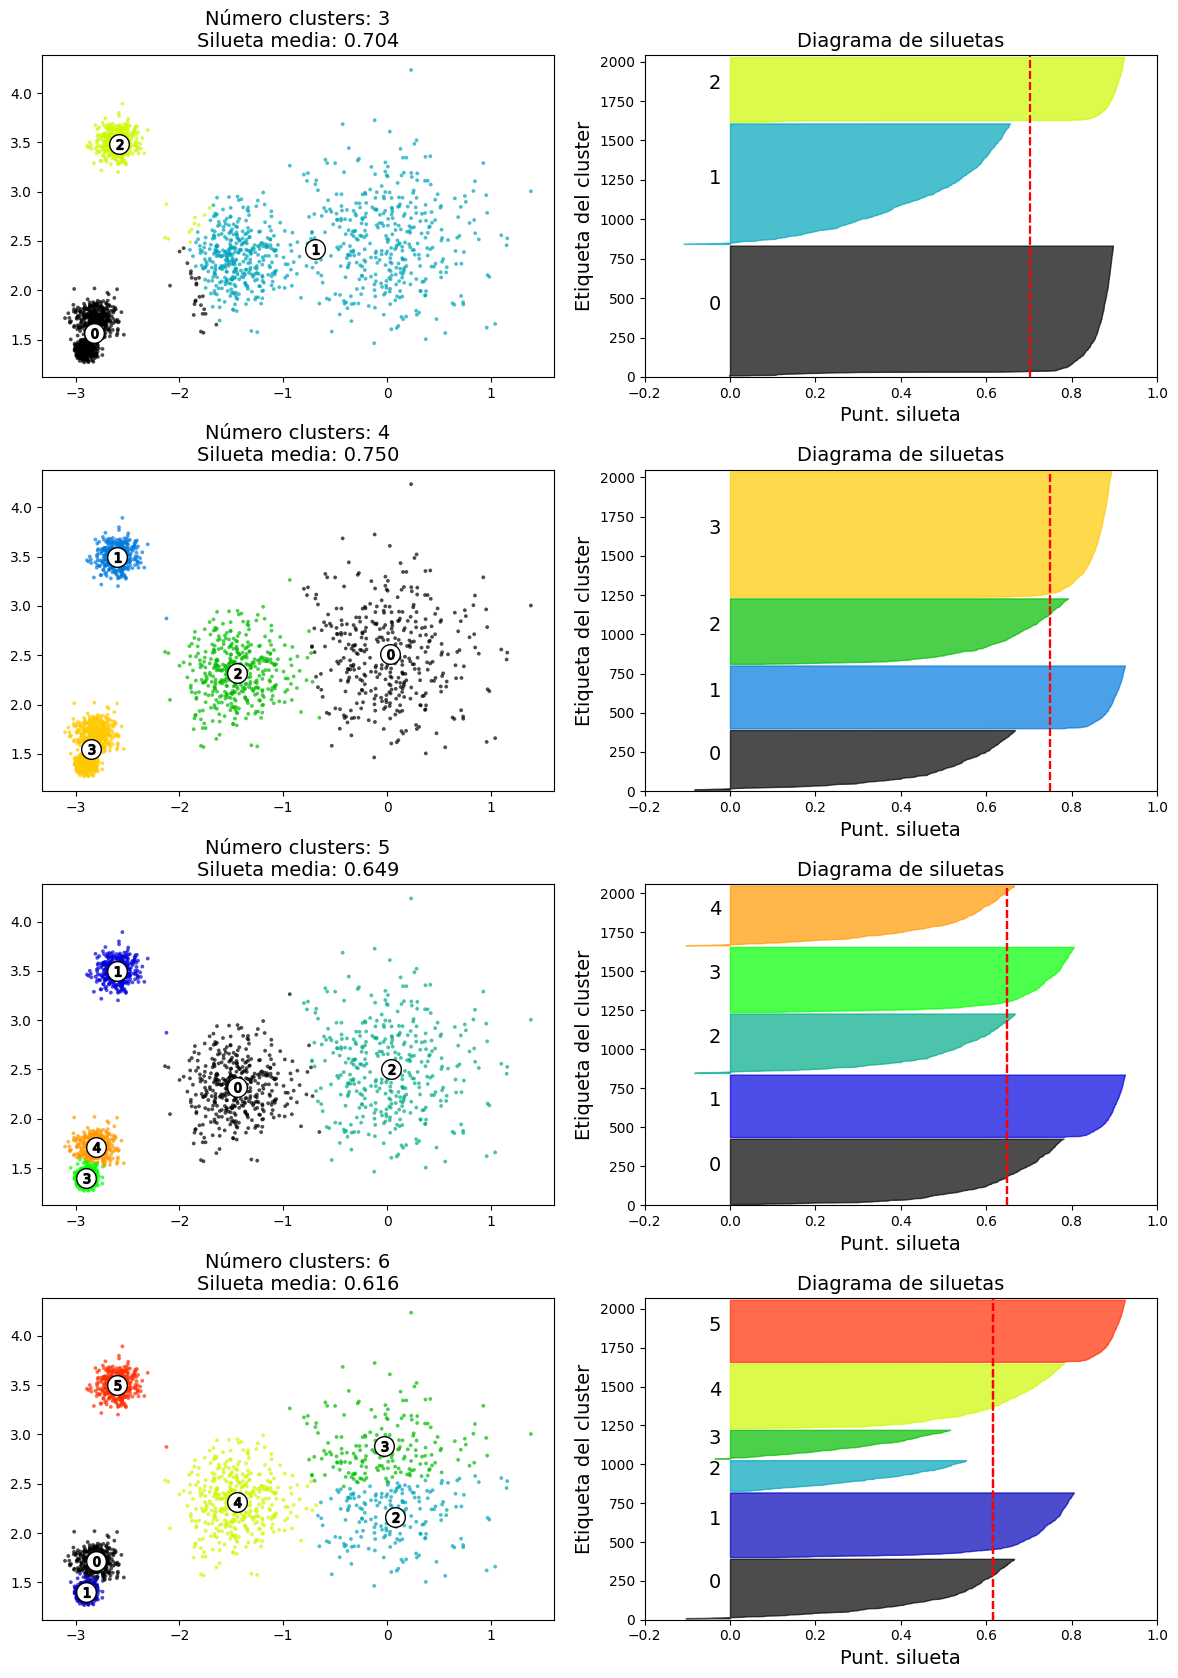

In [14]:
#Apartado 8

from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

plt.figure(figsize=(12, 17))
range_n_clusters = [3, 4, 5, 6]
g = 0

for n_clusters in range_n_clusters:
  # por cada n_clusters, representamos 2 gráficas:

  # el primer gráfico muestra los límites de decisión encontrados, representando tb los centroides
  g = g+1
  ax = plt.subplot(4, 2, g)

  # creamos el clusterer, lo ajustamos y obtenemos las etiquetas predichas
  kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=10, algorithm='lloyd')
  labels = kmeans.fit_predict(X)

  # ponemos como título, el número de cluster y la puntuación de silueta media
  silueta_media = silhouette_score(X, labels)
  plt.title("Número clusters: {}\nSilueta media: {:1.3f}".format(n_clusters, silueta_media))

  # representamos los puntos con los que se ha entrenado el modelo
  # los puntos de cada cluster van de un color diferente
  colors = cm.nipy_spectral(labels.astype(float) / n_clusters)
  ax.scatter(X[:, 0], X[:, 1], marker=".", s=30, linewidths=0, alpha=0.7, c=colors, edgecolor='k')

  # también representamos los centroides obtenidos por el modelo, numerados
  centers = kmeans.cluster_centers_
  ax.scatter(centers[:,0], centers[:,1], marker='o', c='white', alpha=1, s=200, edgecolor='k')
  for i, c in enumerate(centers):
    ax.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor='k')


  # el segundo gráfico es el diagrama de siluetas
  g = g+1
  ax = plt.subplot(4, 2, g)
  plt.xlim((-0.2, 1.0))
  plt.ylim((0, len(X) + (n_clusters + 1)*10)) # para separar los datos de cada cluster

  # obtenemos la silueta de cada ejemplo
  silueta_ejemplos = silhouette_samples(X, labels)

  y_lower = 10 # separación entre clusters en el eje y

  for i in range(n_clusters):
    # por cada cluster, obtenemos las siluetas de sus ejemplos ordenadas
    silueta_ejemplos_i = silueta_ejemplos[labels == i]
    silueta_ejemplos_i.sort()

    # calculamos el número de ejemplos que hay en cada cluster
    tam_cluster_i = silueta_ejemplos_i.shape[0]
    y_upper = y_lower + tam_cluster_i

    # relleno del cluster:
    # se rellena la región determinada por los intervalos [y_lower, y_upper] y [0, silueta_ejemplos_i]
    color = cm.nipy_spectral(float(i) /n_clusters)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        silueta_ejemplos_i,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    # ponemos las etiquetas de cada cluster al lado de su "cuchillo"
    # se corresponde con el número del centroide que aparece en el gráfico de los bordes de decisión
    ax.text(-0.05, y_lower + 0.5 * tam_cluster_i, str(i))

    # actualizamos valor de y_lower
    y_lower = y_upper + 10

    # establecemos los títulos de este segundo gráfico
    ax.set_title("Diagrama de siluetas")
    ax.set_xlabel("Punt. silueta")
    ax.set_ylabel("Etiqueta del cluster")

    # dibujamos la recta vertical x = silueta_media
    # este valor tb se incluye como títlulo en las gráficas de la izquierda
    ax.axvline(x=silueta_media, color='red', linestyle='--')

plt.tight_layout()


En este apartado se han representado los <b>gráficos de bordes de decisión</b> a la izquierda y el <b>diagrama de siluetas</b> a la derecha, para cada uno de los 4 agrupadores definidos en el apartado anterior.

Para el primer gráfico intenté usar la función ya definida (<i>plot_decision_boundaries</i>), pero al final terminé haciéndola como en el ejemplo del enlace para que se correspondieran los colores con los empleados en el diagrama de siluetas. Tampoco uso las funciones FixedLocator y FixedFormatter de matplotlib.ticker que se proponían. En su lugar, en el diagrama de silueta coloco las etiquetas de cada cluster i como en el ejemplo del enlace haciendo <i>ax.text(-0.05, y_lower + 0.5 * tam_cluster_i, str(i))</i>.

Volviendo a los gráficos obtenidos, nuevamente <b>el mayor valor de silueta medio lo obtenemos con k=4</b>. Sin embargo, <b>el diagrama de siluetas nos dice que el modelo con k=5 es mejor</b> por varios motivos que explico a continuación. Por un lado, para elegir la k correcta usando los diagramas de silueta se debe cumplir que todos los grupos tengan una puntuación de silueta mayor que la puntuación de silueta media del conjunto de datos (representada por la línea vertical roja). Este criterio sólo lo cumple el modelo para k=5. Por otro lado, no debe haber grandes fluctuaciones en el tamaño de los clusters, el cual se representa por la altura de cada cuchillo. Teniendo esto en cuenta, vemos cómo para k=6, los grupos 2 y 3 son la mitad que los otros; para k=4, el cluster 4 es el doble que los otros; y para k=3, los 3 clusters tienen tamaños bastante diferentes. Sólo para k=5 se obtienen los 5 grupos más equilibrados en tamaño.

Además, como en este caso tenemos la suerte de poder representar las fronteras de decisión gráficamente porque las dimensiones lo permiten y éstas coinciden con cómo las clasificaría un humano, elegimos <b>k=5 como el valor óptimo de n_clusters</b>. En conclusión, <b>el agrupador kmeans que mejor modela estos datos tiene los parámetros: n_clusters=5, init='random', n_init=10, algorithm='lloyd'</b>.

In [15]:
#Apartado 9 - Aplicamos k-means al conjunto de datos olivetti
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

# extraemos los datos de olivetti, son de tipo Bunch
olivetti = fetch_olivetti_faces()

# separamos los datos en conjunto de test y de entrenamiento de forma estratificada
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
X_train = []
X_test = []
y_train = []
y_test = []

for i, (train_index, test_index) in enumerate(sss.split(olivetti.data, olivetti.target)):
  X_train = olivetti.data[train_index]
  X_test = olivetti.data[test_index]
  y_train = olivetti.target[train_index]
  y_test = olivetti.target[test_index]

# generamos 3 agrupadores con n_clusters=40 y calculamos su inercia
# a menor inercia, mejor es el modelo a priori
# obtenemos kmeans91 mejor que kmeans93 mejor que kmeans92
k = 40
kmeans91 = KMeans(n_clusters=k, init='k-means++', n_init=10, algorithm='elkan').fit(X_train)
kmeans92 = KMeans(n_clusters=k, init='random', n_init=1, algorithm='elkan').fit(X_train)
kmeans93 = KMeans(n_clusters=k, init='random', n_init=10, algorithm='elkan').fit(X_train)

print("init=k-means++, n_init=10, algorithm=elkan\ninercia: {:3.2f}".format(kmeans91.inertia_))
print("init=random, n_init=1, algorithm=elkan\ninercia: {:3.2f}".format(kmeans92.inertia_))
print("init=random, n_init=10, algorithm=elkan\ninercia: {:3.2f}\n".format(kmeans93.inertia_))

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
init=k-means++, n_init=10, algorithm=elkan
inercia: 9440.59
init=random, n_init=1, algorithm=elkan
inercia: 9922.96
init=random, n_init=10, algorithm=elkan
inercia: 9841.57



Fijando <b>k=40</b> (porque sabemos de antenamo que hay 40 imágenes diferentes en el conjunto de datos) y <b>comparando con la inercia</b>, vemos cómo <u>el modelo kmeans91 es el mejor, seguido del modelo kmeans93 y por último, el modelo kmeans92</u>. En este caso, tenemos en cuenta que un agrupador es mejor que otro cuanto menor es su inercia.

En los 3 modelos que se están comparando hemos usado el <b>algoritmo 'elkan'</b> porque el conjunto de datos que tenemos ahora es el cuádruple del anterior (4096 instancias ahora, frente a 1000 antes), por lo que sí que nos viene bien aplicar el cálculo de distancias acelerado del que hablábamos anteriormente.

El modelo que obtiene mejor inercia es el que <b>se inicializa con k-means++</b>, luego la idea de inicializar los centroides teniendo en cuenta la separabilidad entre ellos mejora los resultados en este problema, como suele ser lo normal. Además, se obtienen mejores resultados <b>ejecutando varias veces el modelo y haciendo la media</b> que ejecutándolo sólo una vez.

A continuación, tratamos de <b>calcular el k óptimo</b>. Nos basamos en las métricas silueta media, inercia e índice de Davies-Bouldin.

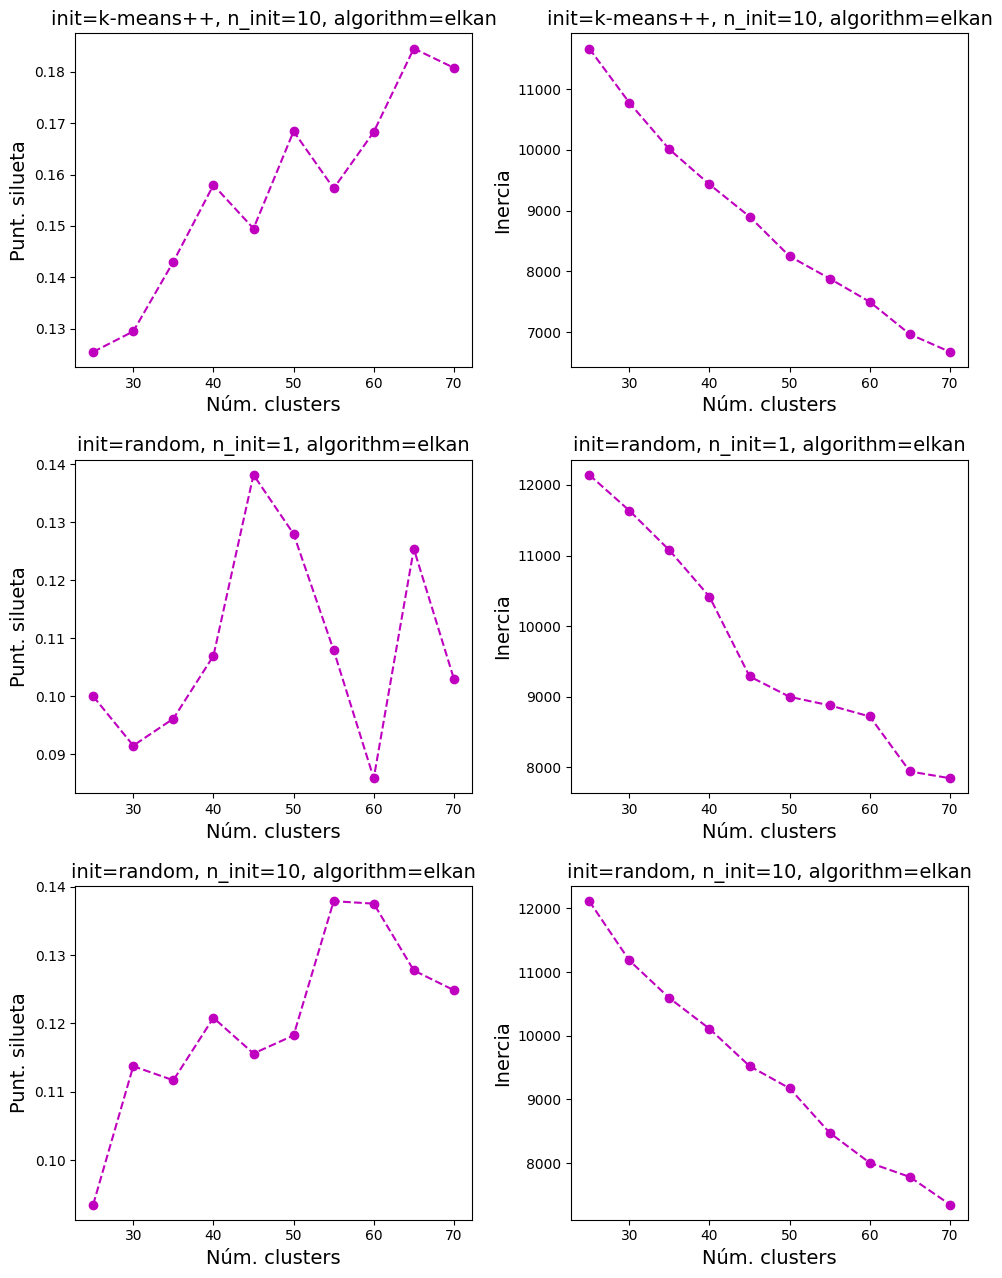

In [16]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# buscamos el k óptimo
n_clusters = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
init = ['k-means++', 'random', 'random']
n_init = [10, 1, 10]
siluetas = []
inercia = []
j = 0
g = 0
plt.figure(figsize=(10, 13))

# creamos los 3 modelos para diferentes número de clusters
for c in range(3):
  siluetas = []
  inercia = []
  davies = []

  for i in n_clusters:
    j = j+1
    kmeans = KMeans(n_clusters=i, init=init[c], n_init=n_init[c], algorithm='elkan')
    labels = kmeans.fit_predict(X_train)
    siluetas.append(silhouette_score(X_train, labels))
    inercia.append(kmeans.inertia_)
    davies.append(davies_bouldin_score(X_train, labels))

  # imprimimos una gráfica para comparar núm clusters y silueta media por cada modelo
  g = g+1
  ax = plt.subplot(3, 2, g)
  plt.plot(n_clusters, siluetas, 'm--o')
  plt.xlabel("Núm. clusters")
  plt.ylabel("Punt. silueta")
  plt.title("init={0}, n_init={1}, algorithm=elkan".format(init[c], n_init[c]))

  # imprimimos una segunda gráfica por cada modelo para comparar la inercia con el núm de clusters
  g = g+1
  ax = plt.subplot(3, 2, g)
  plt.plot(n_clusters, inercia, 'm--o')
  plt.xlabel("Núm. clusters")
  plt.ylabel("Inercia")
  plt.title("init={0}, n_init={1}, algorithm=elkan".format(init[c], n_init[c]))

plt.tight_layout()
plt.show();

Variando el número de clusters, <b>en cuanto a la silueta media</b>, observamos que los 3 modelos tienen varios máximos locales ligeramente diferentes; no obstante, vemos que tanto el modelo 1 como el 3 han obtenido un máximo relativo en k=40. También, decir que los valores de silueta media encontrados en general, no son muy buenos porque están más cerca de 0 que de 1, es decir, las instancias se encuentran en los límites de clusters y, como ocurrirá, no llegan a ser buenas fronteras de decisión...

Comparando el número de clusters con la inercia (las gráficas de arriba a la derecha) <b>no se ve muy claro el "codo"</b> que nos indica el número de clusters óptimo, como suele ocurrir en la práctica. Quizás el modelo 2 tenga un codo en el k=45, coincidiendo con el máximo global de la silueta media; pero los otros modelos tienen más fiabilidad porque se han hecho con un n_init mayor que 1.

A continuación comparamos los modelos anteriores según el <b>índice Davies-Bouldin</b>, el cual cuantifica la separabilidad media de un cluster frente a la del cluster más cercano. El modelo será mejor cuanto más pequeño sea este índice, pues queremos alta separación entre clusters y baja variabilidad intra-cluster; aunque al igual que la inercia tampoco nos interesa que sea la mínima posible. Viendo los resultados de abajo, vemos que se alcanza varios mínimos locales en k=40, k=50 y k=60.

Juntando todo, podemos determinar que el <b>k óptimo es k=40</b>.

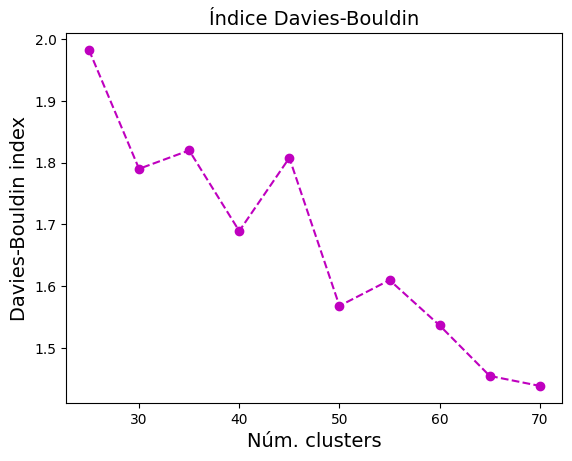

In [17]:
# Visualizamos el valor de los índices Davies-Bouldin por cada n_clusters
plt.plot(n_clusters, davies, 'm--o')
plt.xlabel("Núm. clusters")
plt.ylabel("Davies-Bouldin index")
plt.title("Índice Davies-Bouldin")
plt.show();

**Predecimos los valores de X_test** según el mejor modelo de kmeans entrenado, el cual tiene los siguientes atributos: <i>n_clusters=40, init='k-means++', n_init=10, algorithm='elkan'</i>.

Aciertos: 2 - Fallos: 78


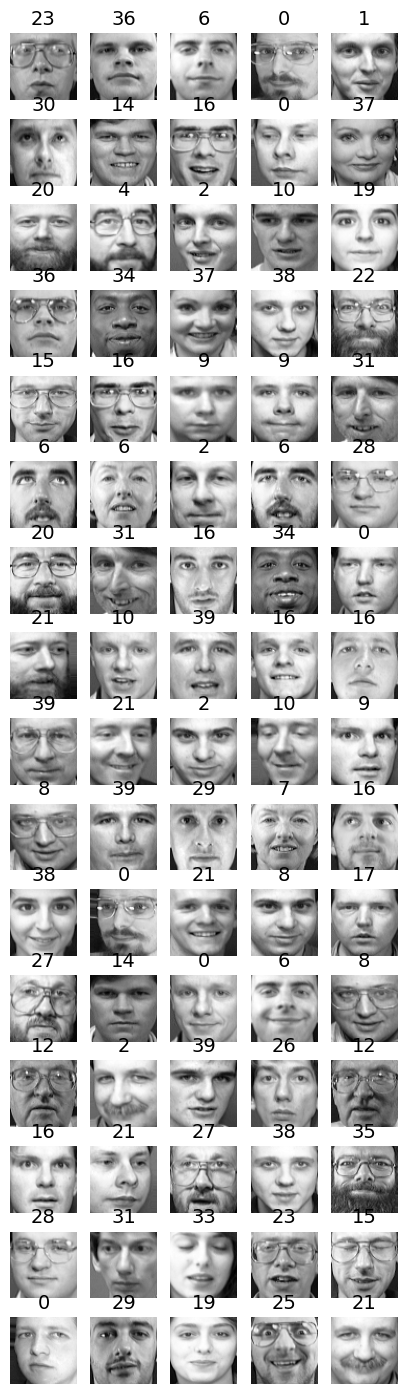

In [25]:
# mejor modelo entrenado
best_kmeans = KMeans(n_clusters=40, init='k-means++', n_init=10, algorithm='elkan').fit(X_train)

# predecimos los datos de test
labels = best_kmeans.predict(X_test)
aciertos = 0
fallos = 0

for i in range(len(labels)):
  if (y_test[i] == labels[i]):
    aciertos = aciertos + 1
  else:
    fallos = fallos + 1

print("Aciertos: {} - Fallos: {}".format(aciertos, fallos))

# mostramos las caras
plot_faces(X_test, labels)

#### <b>Conclusiones ejercicio 1.A.9</b>

La clasificación de las caras es pésima usando el modelo kmeans entrenado, luego no hemos sido capaces de agrupar los rostros de las mismas personas de forma no supervisada. Podemos decir que se ha obtenido un sobreajuste del modelo a los datos de entrenamiento porque no ha generalizado bien los datos de test. <b>Faltaría realizar un preprocesamiento</b> de los datos previo al entrenamiento, incluso tratar de detectar ouliers y eliminarlos antes de todo.

### <font color='blue'>Ejercicio 1.B: Utilización de DBSCAN (1 punto)</font>

<font color='blue'> En este ejercicio haremos algo similar a lo realizado en el anterior, pero ahora con otro problema sintético en 2D y el algoritmo DBSCAN. Para crear el conjunto sintético haremos uso de la función `make_moons` dentro del paquete de `sklearn.datasets`. Crearemos un conjunto sintético de $1.000$ puntos con una tasa de ruido de $0.05$.


<font color='blue'> Las tareas a realizar a realizar en este ejercicio se resumen a continuación:
1. A partir del conjunto de datos especificado, ajusta un algoritmo DBSCAN con los hiperparámetros por defecto (5 mínimas muestras por cluster). Identifica los índices de los ejemplos núcleo (_core points_)) e imprime sus coordenadas. Para ello, emplea las variables de instancia `core_sample_indices_` y `components_`, respectivamente.
2. La variable de instancia `labels_` contiene el núcleo al que pertenece cada ejemplo
del conjunto de datos. Observa que algunas instancias tienen un índice de cluster
igual a -1, lo que significa que el algoritmo las considera anomalías. En un conjunto
sencillo como este, en un principio, no debería haber anomalías. El hiperparámetro `eps` indica la distancia
máxima entre dos muestras para que una se considere vecina de la otra (no se trata de un
límite máximo de las distancias de los puntos dentro de un cluster). Es el hiperparámetro
de DBSCAN más importante que debes elegir adecuadamente para tu conjunto de datos y
función de distancia. Ajusta 4 modelos de DBSCAN con el hiperparámetro $eps$ igual a
$\{0.01,0.02,0.05,0.1\}$. Dibuja una representación de los clústers para cada modelo
identificando las anomalías que tiene en el gráfico y dando el porcentaje de anomalías
de cada modelo. Analiza y explica los resultados obtenidos.
3. Sorprendentemente, la clase DBSCAN no tiene un método `predict()`,
aunque sí tiene un método `fit_predict()`. En otras palabras, no puede predecir
a qué cluster pertenece una nueva instancia. Esta decisión se tomó porque diferentes
algoritmos de clasificación pueden ser mejores para diferentes tareas, por lo que los
autores decidieron dejar que el usuario eligiera cuál utilizar. Pero sí se puede usar
un clasificador para ver en qué cluster está cada punto nuevo. Hazlo con un clasificador
kNN con un vecindario de 30 vecinos, usando el mejor modelo del apartado anterior y utilizando como
ejemplos de entrenamiento los _core points_ encontrados y como etiquetas (salidas deseadas) las `labels_` obtenidas. Obtén el cluster asociado y la probabilidad para los
siguientes 4 ejemplos `[[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]]`.
Junto con lo anterior, dibuja un gráfico que represente los bordes de decisión y aplica también k-means sobre los mismo datos. Analiza las diferencias entre dichas fronteras de decisión en base al funcionamiento y naturaleza de los dos algoritmos subyacentes.
    
<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas.



---



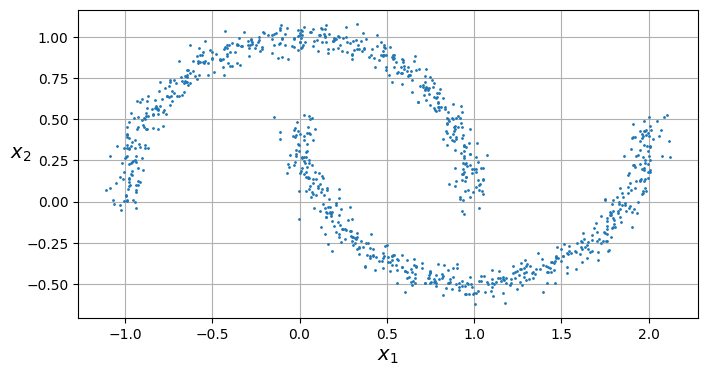

In [26]:
#Apartado 1
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# creamos los datos con los que vamos a trabajar
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [27]:
# creamos el clusterer DBSCAN con los parámetros por defecto
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan.fit(X)

# sacamos el número de core points e imprimimos sus coordenadas
n_core_points = dbscan.core_sample_indices_.shape[0]
print("Número de core points: ", n_core_points)

for i in range(n_core_points):
  print("Core point {}: {}".format(i, dbscan.components_[i]))

Número de core points:  1000
Core point 0: [-0.02137124  0.40618608]
Core point 1: [ 0.97670045 -0.45832306]
Core point 2: [ 0.90405882 -0.37651952]
Core point 3: [ 0.37736316 -0.39703717]
Core point 4: [-0.84192557  0.53058695]
Core point 5: [ 0.58930337 -0.32137599]
Core point 6: [ 0.29248724 -0.20696309]
Core point 7: [-0.02637836  0.44766267]
Core point 8: [ 1.6201408  -0.28758856]
Core point 9: [0.68246733 0.80712069]
Core point 10: [ 1.26718285 -0.40793471]
Core point 11: [0.87418608 0.50781041]
Core point 12: [ 0.3322007  -0.19032202]
Core point 13: [1.952812   0.22552333]
Core point 14: [1.9797373 0.0831513]
Core point 15: [ 1.72926364 -0.08800079]
Core point 16: [-0.20280226  1.02277576]
Core point 17: [ 1.7895881  -0.16231967]
Core point 18: [ 1.0280974 -0.4830331]
Core point 19: [-0.41546771  0.93423658]
Core point 20: [0.00346747 0.17635817]
Core point 21: [0.48310182 0.95150758]
Core point 22: [-0.64419537  0.72552881]
Core point 23: [-0.00995689  0.3510225 ]
Core point 24

In [28]:
# comprobamos la inexistencia de anomalías para el clustering considerado,
# pues se han obtenido 1000 core points de 1000 instancias que hay en total
indices = np.argwhere(dbscan.labels_ == -1)
print(indices)
print(dbscan.labels_)

[]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0

En este apartado hemos usado el <b>modelo DBSCAN con sus parámetros por defecto (eps=0.5, min_samples=5)</b>. A continuación voy a explicar el funcionamiento de este clusterer y qué representan dichos parámetros. El algoritmo DBSCAN considera los agrupamientos como áreas de alta densidad separadas por áreas de baja densidad. Para cada instancia, el algoritmo cuenta cuántas instancias están a una distancia <b>eps</b> de ella (por defecto se trata la distancia euclídea). Si una distancia tiene al menos <b>min_samples</b> instancias en su vecindad, se considera un core point. Así, todas las instancias en la vecindad de un core point pertenecen al mismo cluster y si un ejemplo no es central ni tiene a nadie en su vecindad, se considera como anomalía, clasificándola en el cluster -1. Esto hace que sea robusto frente a valores atípicos.

Los clusteres DBSCAN pueden tratar con conjuntos de datos de cualquier forma; mientras que los kmeans necesitan que el conjunto esté agrupado en zonas convexas (como visualizaremos más abajo). No obstante, el DBSCAN falla cuando la densidad varía significativamente entre conglomerados o si no hay una región de densidad lo suficientemente baja alrededor de algunos conglomerados.

Volviendo al <b>apartado 1</b>, considerando el DBSCAN con los valores por defecto, no estamos obteniendo un buen clustering porque se ha elegido un epsilon muy alto para este problema. En concreto, hemos obtenido que todos los puntos del conjunto de datos son <i>core points</i>, clasificando a todo el conjunto en un único cluster, el cluster 0. Así, tampoco hay anomalías.

Modelo DBSCAN  0
- Número de core points:  0
- Número de clusters:     0
- Número de anomalías:    1000
Modelo DBSCAN  1
- Número de core points:  34
- Número de clusters:     16
- Número de anomalías:    908
Modelo DBSCAN  2
- Número de core points:  808
- Número de clusters:     7
- Número de anomalías:    77
Modelo DBSCAN  3
- Número de core points:  992
- Número de clusters:     2
- Número de anomalías:    1


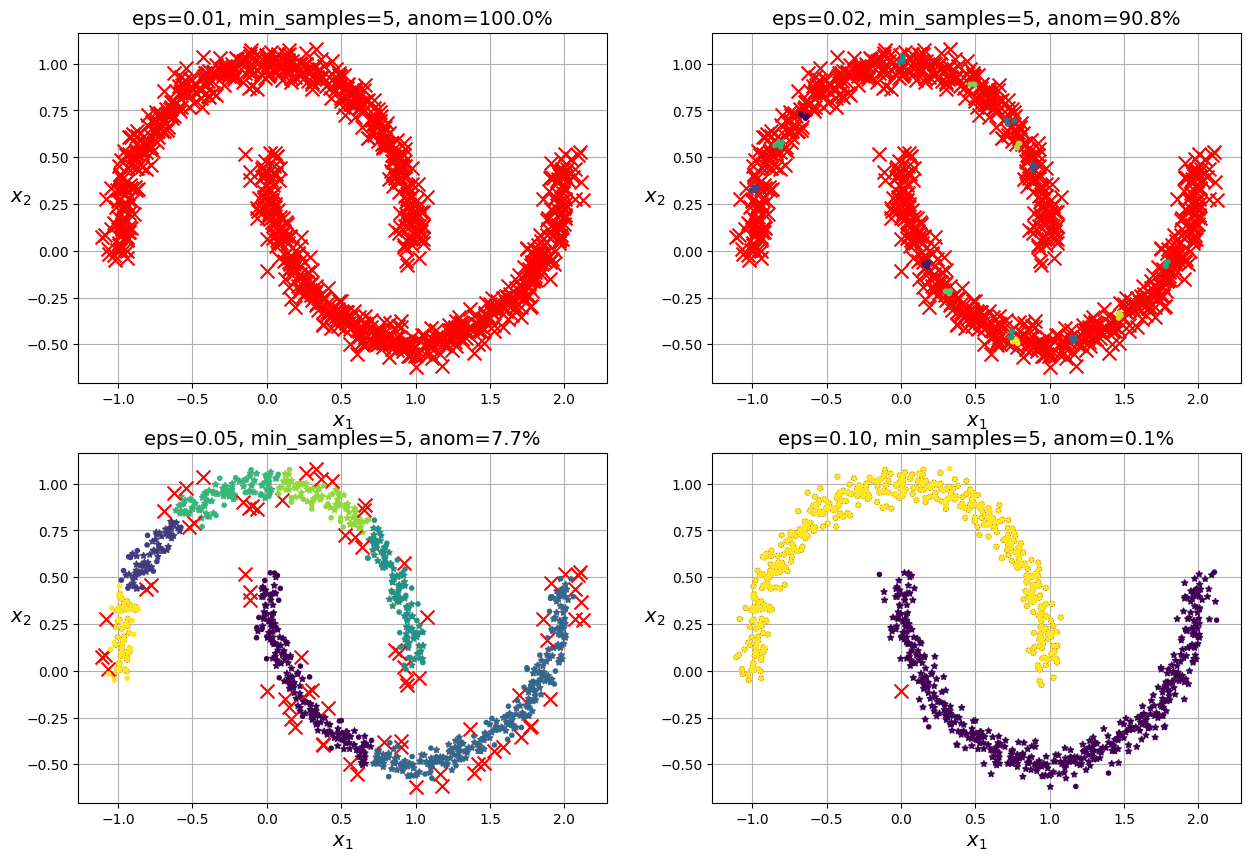

In [29]:
#Apartado 2
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True, anom_rate = 0):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}, anom={anom_rate}%")
    plt.grid()
    plt.gca().set_axisbelow(True)

# creamos 4 modelos para 4 valores de epsilon diferentes
eps = [0.01, 0.02, 0.05, 0.1]
plt.figure(figsize=(15, 10))

for i in range(len(eps)):
  # creamos y entrenamos el modelo
  dbscan = DBSCAN(eps=eps[i], min_samples=5, metric='euclidean').fit(X)

  # mostramos el número de core points, el número de clusters encontrados (sin contar el de las anomalías) y el núm de anomalías
  print("Modelo DBSCAN ", i)
  print("- Número de core points: ", dbscan.core_sample_indices_.shape[0])
  print("- Número de clusters:    ", len(np.unique(dbscan.labels_))-1)
  print("- Número de anomalías:   ", len(np.argwhere(dbscan.labels_ == -1)))

  # mostramos los clusters encontrados (puntos con forma de estrella) y las anomalías (cruces rojas)
  ax = plt.subplot(2, 2, i+1)
  anom_rate = 100 * (len(np.argwhere(dbscan.labels_ == -1)) / (1.0*1000))
  plot_dbscan(dbscan, X, 10, anom_rate=anom_rate)

Con este apartado, nos damos cuenta de la <b>importancia del hiperparámetro epsilon</b> y cómo puede variar el clustering según el valor del mismo que se considere. Para este problema, con un epsilon muy pequeño (<b>eps=0.01</b>), todos los valores del conjunto de datos se clasifican como anomalías, pues no existe ninguna región lo suficientemente densa como para que considerarla un cluster. Con <b>eps=0.02</b> vemos que se forman 16 clusters, pero sigue siendo una mala clusterización porque el número de anomalías es muy alto. Con <b>eps=0.05</b>, vemos que el ratio de anomalías decrece hasta el 7.7% pero aún así dividir el conjunto en 7 clusters no es lo que esperamos. Finalmente, con <b>eps=0.1</b> sí conseguimos un ratio mínimo de anomalías y logramos agrupar el conjunto en las dos medias lunas que esperábamos, las cuales, de hecho, tienen una densidad muy similar. Concluimos que considerar el radio de vecindad como 0.1 ha sido lo adecuado para este problema.

In [30]:
#Apartado 3
from sklearn.neighbors import KNeighborsClassifier

X_test = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

# recuperamos el mejor MODELO DBSCAN obtenido en el apartado anterior y lo entrenamos
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='euclidean').fit(X)

# extraemos las coordenadas de sus core_points y sus respectivas etiquetas
core_points = []
labels = []
n_core_points = dbscan.core_sample_indices_.shape[0]
print("Modelo DBSCAN. Número core points: ", n_core_points)

for i in range(n_core_points):
  core_points.append(dbscan.components_[i])
  labels.append(dbscan.labels_[dbscan.core_sample_indices_[i]])

Modelo DBSCAN. Número core points:  992


Recuperamos el mejor <b>modelo DBSCAN</b> obtenido en el apartado anterior (eps=0.1) y lo entrenamos con los datos de <i>make_moons</i>. A continuación, en la siguiente celda le aplicamos un <b>clasificador kNN</b> para predecir los nuevos ejemplos. Creamos el kNN tomando como datos de entrenamiento los core points del DBSCAN y como etiquetas las correspondientes a dichos puntos. Estos datos los extraemos del modelo dbscan con los atributos <i>core_sample_indices_</i> y <i>components_</i>. Una vez entrenado el kNN, predecimos los nuevos datos que están inicializados en <i>X_test</i> y mostramos los clusters a los que los envía, ya sea el cluster 0 o el cluster 1, pues el modelo DBSCAN que estamos tratando obtiene 2 grupos. Finalmente, visualizamos los bordes de decisión que ha encontrado el kNN y en los que se ha basado para predecir dichos agrupamientos. Para ello, usamos la función definida en el ejercicio 1.A marcando <i>show_centroids=False</i>. En esta gráfica de decisión, añadimos los puntos que se han predicho como puntos blancos con borde rojo para que resalten respecto a los negros del conjunto de entrenamiento <i>X</i>.


Predicciones kNN:
Nuevo ejemplo [-0.5  0. ] - Predicción 1
Nuevo ejemplo [0.  0.5] - Predicción 0
Nuevo ejemplo [ 1.  -0.1] - Predicción 1
Nuevo ejemplo [2. 1.] - Predicción 0


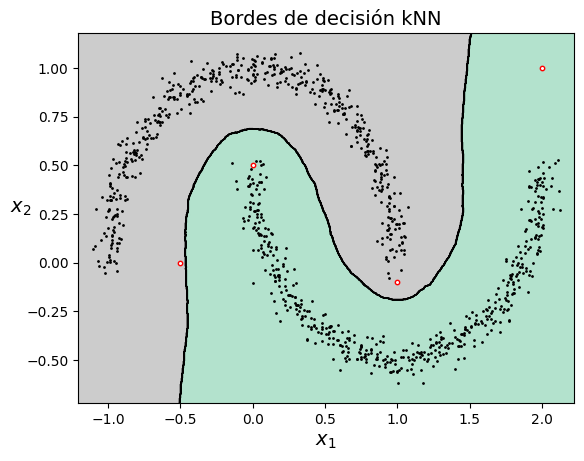

In [31]:
# creamos el CLASIFICADOR kNN
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(core_points, labels)

# predecimos las nuevas instancias
y_pred_neigh = neigh.predict(X_test)
print("\nPredicciones kNN:")

# mostramos la predicción obtenida para cada nueva instancia
for i in range(len(y_pred_neigh)):
  print("Nuevo ejemplo {} - Predicción {}".format(X_test[i], y_pred_neigh[i]))

# dibujamos los bordes de decisión y les añadimos las nuevas instancias con puntos blancos de borde rojo
plot_decision_boundaries(neigh, X, show_centroids=False)
plt.scatter(X_test[:,0], X_test[:,1], marker='o', c='white', s=10, edgecolor='red')
plt.title("Bordes de decisión kNN")
plt.show();

A continuación, realizamos un <b>kmeans</b> sobre el mismo conjunto de datos <i>make_moons</i>. En concreto, creamos un kMeans con los siguientes parámetros: n_clusters=2, porque sabemos a priori que ese es el número de clusters que hay en el conjunto (como también hemos corroborado con el DBSCAN); init='k-means++', pues es la forma optimizada de inicializar los datos de forma que cada centroide nuevo se cree lo más lejos del anterior seleccionado; n_init=10, para que se repita el proceso 10 veces y se escoja el de menor inercia; algorithm='elkan', por ser más rápido que la opción 'lloyd'.

Una vez entrenado el kmeans con los datos de entrenamiento, predecimos los datos de test mediante el método predict. Igual que antes, mostramos una lista con los nuevos datos a predecir y el cluster al que lo ha enviado kmeans. Para visualizar todo este proceso, también mostramos el gráfico de los bordes de decisión que ha encontrado el kmeans; en este caso, con la visualización de los centroides activada.

Predicciones kmeans:
Nuevo ejemplo [-0.5  0. ] - Predicción 1
Nuevo ejemplo [0.  0.5] - Predicción 1
Nuevo ejemplo [ 1.  -0.1] - Predicción 0
Nuevo ejemplo [2. 1.] - Predicción 0


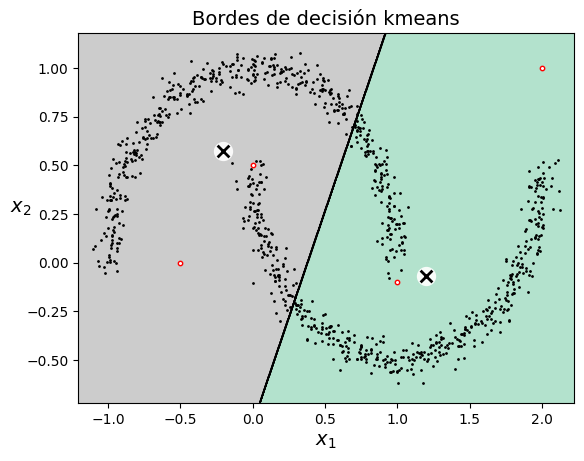

In [32]:
# creamos un clusterer mediante kmeans
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, algorithm='elkan').fit(X)

# predecimos las nuevas instancias
y_pred_kmeans = kmeans.predict(X_test)
print("Predicciones kmeans:")

for i in range(len(y_pred_kmeans)):
  print("Nuevo ejemplo {} - Predicción {}".format(X_test[i], y_pred_kmeans[i]))

# dibujamos los bordes de decisión y les añadimos las nuevas instancias con puntos blancos
plot_decision_boundaries(kmeans, X, show_centroids=True)
plt.scatter(X_test[:,0], X_test[:,1], marker='o', c='white', s=10, edgecolor='red')
plt.title("Bordes de decisión kmeans")
plt.show();

####<b>Análisis de los datos del ejercicio 1.B</b>

Podemos afirmar cómo <b>el modelo DBSCAN ha funcionado mejor que el kmeans</b> para el conjunto de datos <i>make_moons</i>. Efectivamente, <u>el clusterer kmeans da problemas con los conjuntos de datos que no están separados en agrupamientos circulares</u> y en su lugar tienen formas irregulares o alargadas. Esto se debe al funcionamiento interno del kmeans, el cual agrupa los datos por mínima varianza dentro del cluster y como vemos en la gráfica del conjunto de datos, dentro de la media luna de arriba hay puntos que están más cerca de la media luna inferior que de la superior, haciendo que el borde de decisión sea una diagonal que parte el conjunto por la mitad. Sin embargo, el modelo DBSCAN no tiene ese problema porque trabaja con densidades y de esta forma, sí se divide el conjunto en 2 zonas con densidad parecida separadas por zonas con menor densidad de puntos.

Por otro lado, es cierto que <u>el modelo kmeans es más rápido y eficiente que el DBSCAN</u> pero para este conjunto de datos tampoco ha sido tan lento el DBSCAN. También cabe destacar que <u>el modelo DBSCAN no precisa conocer el número de clusters a priori</u> (o realizar un proceso de optimización del mismo) y <u>funciona mejor con <i>outliers</i></u> porque los trata como anomalías en lugar de considerarlos en las medias como hace kmeans.



## <font color='blue'>Ejercicio 2: PROBLEMA DE AGRUPAMIENTO (5 puntos)</font>

<font color='blue'> Para la realización de este ejercicio, se ha seleccionado el dataset denominado "Anuran Calls (MFCCs)" [1] (https://archive.ics.uci.edu/dataset/406/anuran+calls+mfccs). Este conjunto de datos describe las características sonoras de los cantos de diferentes especies de anfibios del orden Anura, cuyos integrantes coloquialmente son conocidos como ranas o sapos.

<font color='blue'> Se encuentran representados por medio de los coeficientes cepstrales en las frecuencias de Mel ([_Mel-frequency cepstral coefficients_](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum), MFCCs), que son en esencia, una representación abstracta de una señal de audio obtenida al aplicar una transformada del coseno discreta a un espectrograma de Mel, es decir, una representación  de las frecuencias auditivas que son capaces de captar los humanos. Debido a ser una representación compacta del [espectrograma](https://en.wikipedia.org/wiki/Spectrogram), manteniendo las características más importantes del audio, se utiliza de forma regular en procesado del habla y aplicaciones de aprendizaje automático en procesado de señales de audio [2].

<font color='blue'> El dataset, creado por investigadores de la Universidad Federal del Amazonas en Brasil, contiene individuos de 10 especies, también incluyéndose su género y familia taxonómica, con el objetivo original de lograr realizar una clasificación multiclase de las especies de anuros que fueron grabados en los terrenos de la Universidad, así como de Mata atlántica (Brasil) y Córdoba (Argentina) en condiciones reales, es decir, con ruido de fondo.
    
<font color='blue'> Este conjunto de datos se utilizó en varias tareas de clasificación relacionadas con el reto del reconocimiento de especies de anuros a través de sus llamadas. Se trata de un conjunto de datos multietiqueta con tres columnas de etiquetas. Este conjunto de datos se creó segmentando 60 registros de audio pertenecientes a 4 familias diferentes, 8 géneros y 10 especies. Cada audio corresponde a un espécimen (una rana individual), el ID del registro también se incluye como columna adicional. Se utilizaron la entropía espectral y un método de cluster binario para detectar los fragmentos de audio pertenecientes a cada sonido. La segmentación y la extracción de características se realizaron en Matlab. Tras la segmentación se obtuvieron 7195 sílabas, que se convirtieron en instancias para entrenar y probar el clasificador.

<font color='blue'> Resulta entonces interesante saber si las clasificaciones taxonómicas realizadas tienen sentido en cuanto a los datos, es decir, ¿realmente se corresponden de cierta forma los distintos cantos de los anuros con la clasificación que poseen actualmente? ¿O existen especies que, siendo de diferentes grupos taxonómicos, poseen un canto indistinguible?

### <font color='blue'> Objetivos
    
<font color='blue'> El objetivo del presente trabajo es analizar los patrones de los datos, sin tomar en cuenta su _ground truth_, para determinar si la clasificación taxonómica actual corresponde razonablemente con una diferencia en los cantos. Claro está que este estudio representará un análisis superficial del problema, pero al menos sí podrá servir de base para estudiar si podemos determinar una taxonomía aproximada de los anuros.

<font color='blue'> Para llevar a cabo este objetivo principal se llevarán a cabo los siguientes objetivos secundarios:
1. <font color='blue'> Realización de un análisis exploratorio de los datos para una primera observación de las distribuciones de los cantos.
2. Detección y eliminación de _outliers_ así como las transformaciones necesarias para que los datos sean lo más "correctos" para los métodos de _clustering_.
4. Experimentación y determinación de los algoritmos y métricas intrínsecas más acordes a los datos. El alumnado debe experimentar con, al menos, dos algoritmos diferentes de _clustering_.

### <font color='blue'> Hipótesis
<font color='blue'>Sobre los datos se pueden realizar las siguientes hipótesis:
- <font color='blue'>Los datos, siendo grabaciones que incluyen el ruido de fondo, poseerán una cantidad significativa de _outliers_.
- <font color='blue'>Será posible, al menos en parte, observar cierta "agrupación" en los datos a simple vista.
- <font color='blue'>Existirá cierta correlación entre los _MFCCs_ debido a que provienen de una misma grabación, por lo que ciertas columnas/características crecerán o disminuirán de forma conjunta. En otras palabras, como el dispositivo empleado para adquirir sonidos es el mismo para todas las pistas de audio (7195), es razonable pensar que si algún _MFCC_ presenta algún problema, o atenuación de algún tipo, dicha particularidad podrá estar presente en todas las instancias/observaciones.  

### <font color='blue'> Resultados Esperados
<font color='blue'> Se espera que los resultados que se obtengan del clustering sean razonablemente parecidos a la realidad. Es decir, se espera que el agrupamiento encontrado tenga algún tipo de relación con alguna de las últimas 4 columnas de los datos (_Family_, _Genus_, _Species_ o _RecordID_).

### <font color='blue'> Bibliografía

<font color='blue'><font color='blue'>[1] E. N. Juan Colonna, “Anuran Calls (MFCCs).” UCI Machine Learning Repository, 2015. doi: 10.24432/C5CC9H. https://archive.ics.uci.edu/dataset/406/anuran+calls+mfccs

<font color='blue'>[2] “3.8. The cepstrum, mel-cepstrum and mel-frequency cepstral coefficients (MFCCs) — Introduction to Speech Processing.” Accessed: Jan. 13, 2024. [Online]. Available: https://speechprocessingbook.aalto.fi/Representations/Melcepstrum.html#the-cepstrum




In [33]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190250 sha256=a0a4896353d25e7384c23a496733ced6eb6a42a7476b9f881e2b9d81fb10396b
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


In [34]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.decomposition import PCA
from pyod.models.iforest import IForest
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta 'clasificacion' (que contiene optdigits.tes, optdigits.tra, optdigits.names)
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Mounted at /content/drive


In [36]:
dataFolder = 'drive/MyDrive/Colab Notebooks/clustering/'

In [37]:
df_frogs = pd.read_csv(dataFolder + "/dataset/Frogs_MFCCs.csv")
df_frogs

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  \
0    -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568   
1    -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303   
2    -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722   
3    -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498   
4    -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550   
...        ...       ...       ...  ...       ...       ...       ...   
7190 -0.100753  0.037087  0.081075  ...  0.069430  0.071001  0.021591   
7191 -0.116460  0.063727  0.089034  ...  0.061127  0.068978  0.017745   
7192 -0.103317  0.070370  0.081317  ...  0.082474  0.077771 -0.009688   
7193 -0.115799  0.056979  0.089316  ...  0.051796  0.069073  0.017963   
7194 -0.117672  0.058874  0.076180  ...  0.061455  0.072983 -0.003980   

      MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus  \
0     0.057684  0.118680  0.014038  Leptodactylidae  Adenomera   
1     0.020140  0.082263  0.029056  Leptodactylidae  Adenomera   
2    -0.025083  0.099108  0.077162  Leptodactylidae  Adenomera   
3    -0.054766 -0.018691  0.023954  Leptodactylidae  Adenomera   
4    -0.031346  0.108610  0.079244  Leptodactylidae  Adenomera   
...        ...       ...       ...              ...        ...   
7190  0.052449 -0.021860 -0.079860          Hylidae     Scinax   
7191  0.046461 -0.015418 -0.101892          Hylidae     Scinax   
7192  0.027834 -0.000531 -0.080425          Hylidae     Scinax   
7193  0.041803 -0.027911 -0.096895          Hylidae     Scinax   
7194  0.031560 -0.029355 -0.087910          Hylidae     Scinax   

             Species  RecordID  
0     AdenomeraAndre         1  
1     AdenomeraAndre         1  
2     AdenomeraAndre         1  
3     AdenomeraAndre         1  
4     AdenomeraAndre         1  
...              ...       ...  
7190     ScinaxRuber        60  
7191     ScinaxRuber        60  
7192     ScinaxRuber        60  
7193     ScinaxRuber        60  
7194     ScinaxRuber        60  

[7195 rows x 26 columns]

####**1. Análisis exploratorio de los datos**

En primer lugar, realizamos un análisis general de los datos. Antes de nada, es importante eliminar las etiquetas de nuestro conjunto de datos de entrenamiento $X$ porque estamos tratando un problema de clustering de <b>aprendizaje no supervisado</b>.

In [55]:
# En primer lugar, realizamos un análisis exploratorio de los datos para tener una visión de las distribuciones de los cantos

# Extraemos las etiquetas del conjunto de datos
y_family = df_frogs.loc[:, 'Family']
y_genus = df_frogs.loc[:, 'Genus']
y_species = df_frogs.loc[:, 'Species']
y_record = df_frogs.loc[:, 'RecordID']

# imprimimos el número de instancias que se clasifican en cada familia, género y especie
print("\n", y_family.value_counts())
print("\n", y_genus.value_counts())
print("\n", y_species.value_counts())

# Eliminamos las columnas de etiquetas de los datos X
X = df_frogs.drop(['Family', 'Genus', 'Species', 'RecordID'], axis=1)
print("\nConjunto de datos sin etiquetas (n_samples, n_features): ", X.shape) # (7195, 22)



 Family
Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: count, dtype: int64

 Genus
Adenomera        4150
Hypsiboas        1593
Ameerega          542
Dendropsophus     310
Leptodactylus     270
Scinax            148
Osteocephalus     114
Rhinella           68
Name: count, dtype: int64

 Species
AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: count, dtype: int64

Conjunto de datos sin etiquetas (n_samples, n_features):  (7195, 22)


Tratamos de buscar <b>correlaciones entre los atributos</b> mediante la matriz de correlación. Encontramos varias características que están relacionadas de forma inversamente lineal: la diagonal azul que se sitúa debajo de la diagonal principal. Al representarlas en gráficas corroboramos esta idea. Esos 9 pares de características los combinamos en nuevas características haciendo su fracción y los añadimos a $X$. Con esto pretendremos <b>añadir atributos significativos al conjunto de datos</b>.

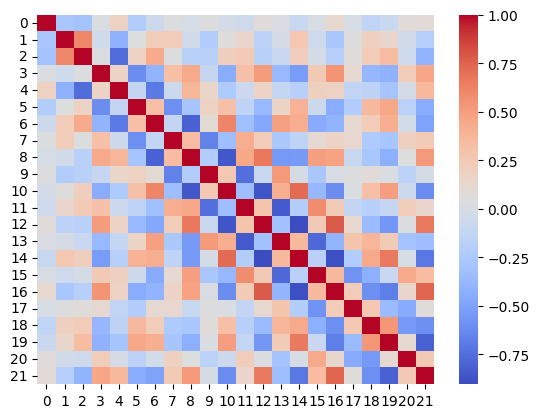

In [39]:
# matriz de correlación entre las 22 características
corr = np.corrcoef(X.T)
sns.heatmap(corr, cmap='coolwarm')
plt.show();

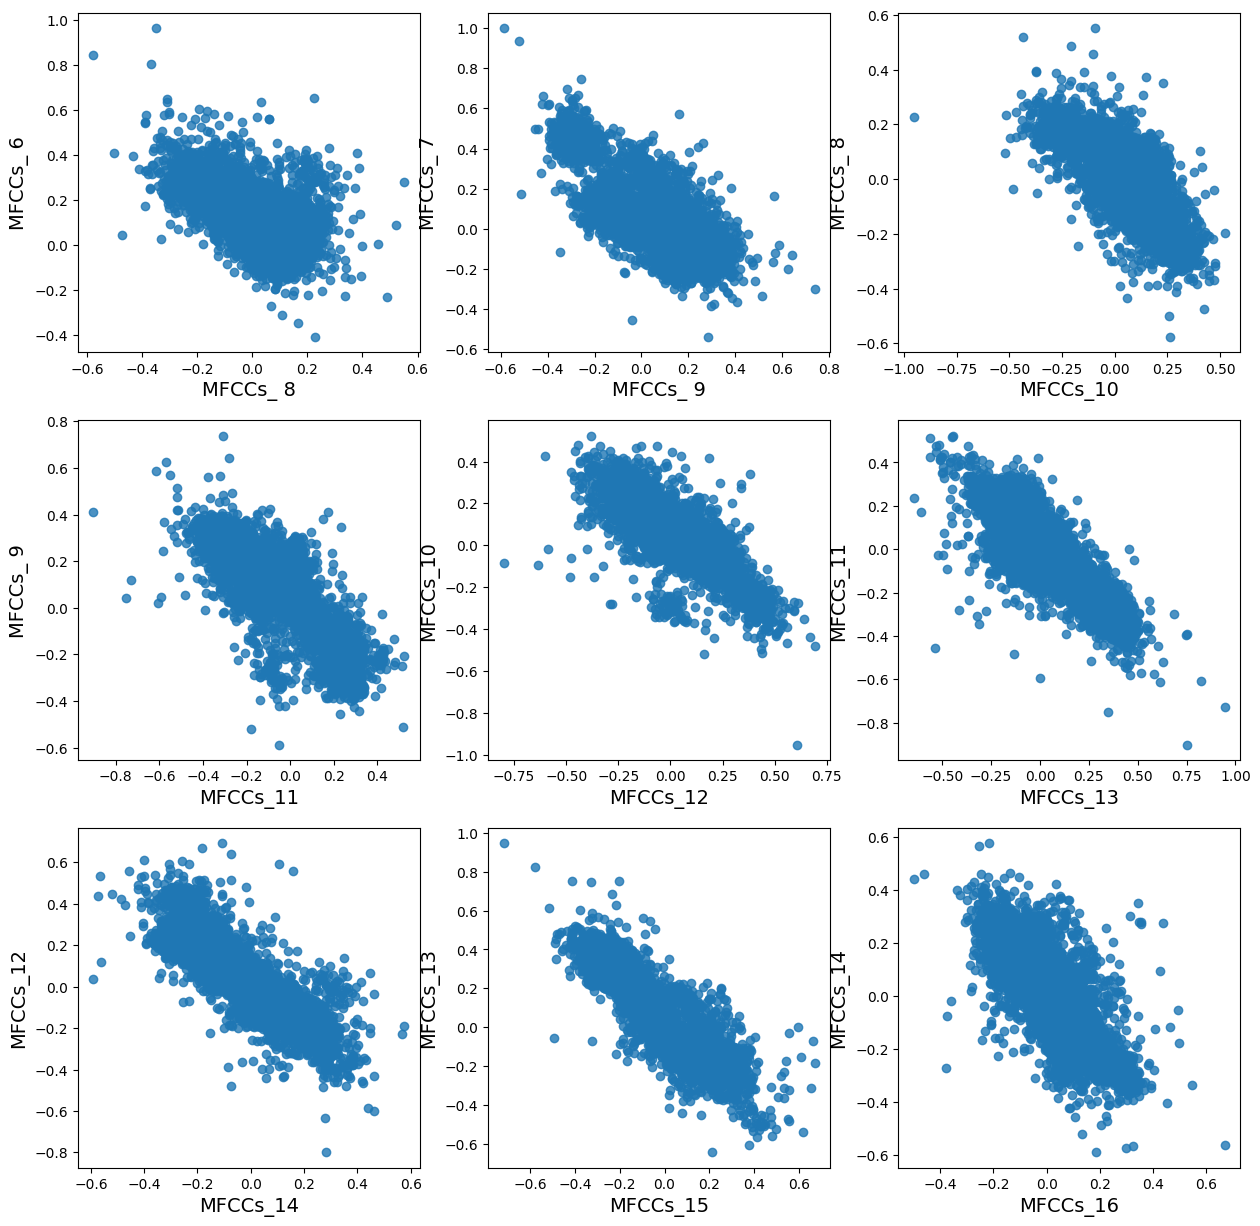

In [40]:
# representamos 9 pares de características que vemos que están correlacionadas inversamente según el mapa de calor
# en concreto estamos cogiendo las características que forman la diagonal azul oscura justo debajo de la diagonal principal, desde (8,10) hasta (16,14)
plt.figure(figsize=(15,15))

for i in range(9):
  ax = plt.subplot(3, 3, i+1)

  ppio1 = "MFCCs_"
  ppio2 = "MFCCs_"
  if (i<2): ppio1 = "MFCCs_ "
  if (i<4): ppio2 = "MFCCs_ "
  atributo_x = ppio1 + str(8+i)
  atributo_y = ppio2 + str(6+i)

  plt.scatter(X[atributo_x], X[atributo_y], alpha=0.8) # comparamos 2 características
  plt.xlabel(atributo_x)
  plt.ylabel(atributo_y)

  # creamos 9 nuevos atributos que son la fracción de estas características
  nuevo_atrib = str(atributo_x + atributo_y)
  X[nuevo_atrib] = X[atributo_x]/X[atributo_y]

In [41]:
# Ahora tenemos 22+9=31 características en nuestro conjunto de datos
X.shape

(7195, 31)

####**2. Detección de anomalías y transformación de los datos**

Ahora, usamos <b>IForest de PyOD</b>, explicado en el ejercicio 3, para detectar outliers y eliminarlos de nuestro conjunto de datos.

In [71]:
isft = IForest(contamination=0.15, max_samples=40, behaviour='new') # establecemos un 15% de contanminación como aproximación inicial
isft.fit(X)

# Training data
y_train_scores = isft.decision_function(X)
y_train_pred = isft.predict(X)

# Threshold for the defined contamination rate
print("The threshold for the defined contamination rate:" , isft.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


The threshold for the defined contamination rate: -2.5102668424828445e-17
The training data: {0: 6115, 1: 1080}


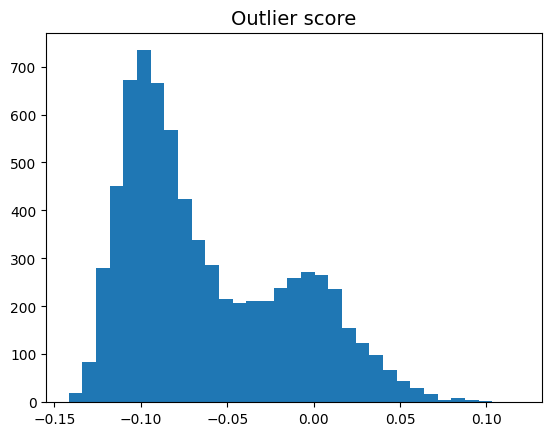

In [72]:
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

Viendo la anterior gráfica, podemos intuir que el valor del umbral está alrededor de -0.05. No obstante, el valor que nos da el algoritmo del umbral es ligeramente mayor: $-1.292614629157425e-17$. Este dato se puede obtener del atributo <i>isft.threshold_</i>.

In [44]:
print(isft.threshold_) # no se corresponde mucho con el umbral de la gráfica...

-1.292614629157425e-17


Determinamos la **importancia de cada característica** mediante el atributo *feature_importances_*. También mostramos un gráfico que las compara visualmente. De este análisis podemos concluir que la característica 0 influirá bastante poco en el clustering y podemos eliminarla.

In [45]:
isft_vi = isft.feature_importances_
print(isft_vi)
print(isft_vi.sum())

[0.00833196 0.03581393 0.03162606 0.02550446 0.03030135 0.04275001
 0.04472484 0.0410305  0.02933532 0.02753727 0.02879118 0.02720729
 0.03479108 0.0311455  0.03426438 0.03492831 0.03014184 0.03012296
 0.03204273 0.03040978 0.03323213 0.0426973  0.03002514 0.03616304
 0.04109476 0.04281028 0.02232047 0.03091477 0.04110261 0.02630447
 0.0225343 ]
1.0


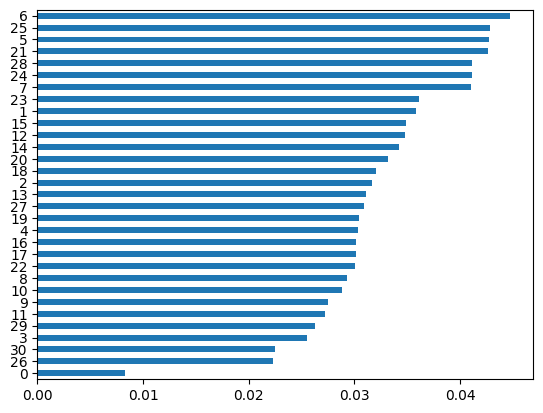

In [46]:
for_plot = pd.DataFrame({'x_axis':X.columns, 'y_axis':isft_vi}).sort_values(by='y_axis',ascending=True)
for_plot['y_axis'].plot.barh();

A continuación, eliminamos la característica 0 del conjunto de entrenamiento y volvemos a entrenar el iForest con el X_reduced.

In [73]:
# eliminamos la característica 0, la cual se llama 'MFCCs_ 1'
X_reduced = X.drop('MFCCs_ 1', axis=1)
X_reduced

MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  MFCCs_ 8  \
0     0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1     0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2     0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3     0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4     0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   
...        ...       ...       ...       ...       ...       ...       ...   
7190 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889 -0.100753   
7191 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628 -0.116460   
7192 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905 -0.103317   
7193 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866 -0.115799   
7194 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596 -0.117672   

      MFCCs_ 9  MFCCs_10  MFCCs_11  ...  MFCCs_13  MFCCs_14  MFCCs_15  \
0    -0.171128  0.124676  0.188654  ... -0.156436  0.082245  0.135752   
1    -0.207693  0.170883  0.270958  ... -0.254341  0.022786  0.163320   
2    -0.219153  0.232538  0.266064  ... -0.237384  0.050791  0.207338   
3    -0.098181  0.270375  0.267279  ... -0.317084 -0.011567  0.100413   
4    -0.172700  0.266434  0.332695  ... -0.298524  0.037439  0.219153   
...        ...       ...       ...  ...       ...       ...       ...   
7190  0.037087  0.081075  0.065905  ... -0.145668 -0.059364  0.024206   
7191  0.063727  0.089034  0.038545  ... -0.164675 -0.105600  0.030767   
7192  0.070370  0.081317  0.062748  ... -0.150025 -0.078615  0.024861   
7193  0.056979  0.089316  0.049792  ... -0.153120 -0.075320  0.022903   
7194  0.058874  0.076180  0.072347  ... -0.150554 -0.073415  0.042517   

      MFCCs_16  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  MFCCs_21  MFCCs_22  
0    -0.024017 -0.108351 -0.077623 -0.009568  0.057684  0.118680  0.014038  
1     0.012022 -0.090974 -0.056510 -0.035303  0.020140  0.082263  0.029056  
2     0.083536 -0.050691 -0.023590 -0.066722 -0.025083  0.099108  0.077162  
3    -0.050224 -0.136009 -0.177037 -0.130498 -0.054766 -0.018691  0.023954  
4     0.062837 -0.048885 -0.053074 -0.088550 -0.031346  0.108610  0.079244  
...        ...       ...       ...       ...       ...       ...       ...  
7190 -0.000861  0.069430  0.071001  0.021591  0.052449 -0.021860 -0.079860  
7191  0.006457  0.061127  0.068978  0.017745  0.046461 -0.015418 -0.101892  
7192  0.008696  0.082474  0.077771 -0.009688  0.027834 -0.000531 -0.080425  
7193  0.001924  0.051796  0.069073  0.017963  0.041803 -0.027911 -0.096895  
7194  0.004158  0.061455  0.072983 -0.003980  0.031560 -0.029355 -0.087910  

[7195 rows x 21 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


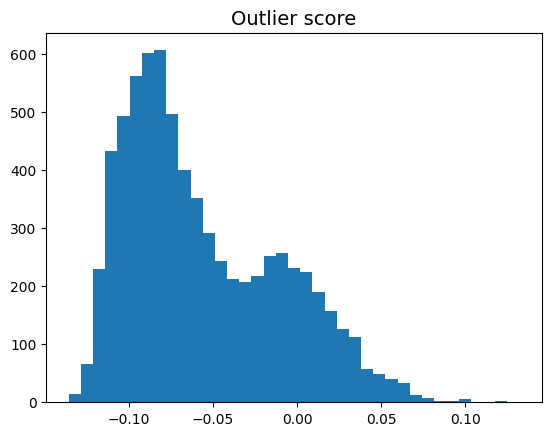

The threshold for the defined contamination rate: 2.921120173548543e-17


In [76]:
# volvemos a entrenar el iForest con el X_reduced
isft = IForest(contamination=0.15, max_samples=40, behaviour='new')
isft.fit(X_reduced)

# predecimos los clusters
y_train_scores = isft.decision_function(X_reduced)

# mostramos el histograma
plt.hist(y_train_scores, bins='auto')
plt.title("Outlier score")
plt.show()

# imprimimos el umbral obtenido
print("The threshold for the defined contamination rate:" , isft.threshold_)

Realizamos las <b>estadísticas de los outliers</b> según el umbral obtenido. Usamos la función definida en el ejercicio 3: <i>descriptive_stat_threshold</i>.

In [78]:
threshold = isft.threshold_

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(3).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_reduced, y_train_scores, threshold) #y_train_scores = isft.decision_scores_

Group  Count    Count %  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  \
0   Normal   6115  84.989576     0.297     0.287     0.456     0.137   
1  Outlier   1080  15.010424     0.474     0.447     0.387     0.072   

   MFCCs_ 6  MFCCs_ 7  MFCCs_ 8  ...  MFCCs_14  MFCCs_15  MFCCs_16  MFCCs_17  \
0     0.081    -0.016     0.005  ...    -0.051    -0.144     0.048     0.119   
1     0.195     0.084    -0.033  ...     0.027     0.139     0.007    -0.085   

   MFCCs_18  MFCCs_19  MFCCs_20  MFCCs_21  MFCCs_22  Anomaly_Score  
0     0.013    -0.059    -0.072     0.036     0.112         -0.070  
1    -0.024     0.006     0.055     0.046    -0.052          0.024  

[2 rows x 25 columns]

A continuación, <b>eliminamos los ejemplos de nuestro conjunto de datos que hemos clasificado como outliers</b> y obtenemos X_filtrado.

In [79]:
# eliminamos los outliers encontrados
df = pd.DataFrame(X_reduced)
df['Anomaly_Score'] = y_train_scores
df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')
df['Group']

0        Normal
1        Normal
2        Normal
3       Outlier
4        Normal
         ...   
7190     Normal
7191     Normal
7192     Normal
7193     Normal
7194     Normal
Name: Group, Length: 7195, dtype: object

In [80]:
df_filtrado = df[df['Group'] == 'Normal']
df_filtrado

MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  MFCCs_ 8  \
0     0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1     0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2     0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
4     0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   
6     0.021676 -0.062075  0.318229  0.380439  0.179043 -0.041667 -0.252300   
...        ...       ...       ...       ...       ...       ...       ...   
7190 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889 -0.100753   
7191 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628 -0.116460   
7192 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905 -0.103317   
7193 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866 -0.115799   
7194 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596 -0.117672   

      MFCCs_ 9  MFCCs_10  MFCCs_11  ...  MFCCs_15  MFCCs_16  MFCCs_17  \
0    -0.171128  0.124676  0.188654  ...  0.135752 -0.024017 -0.108351   
1    -0.207693  0.170883  0.270958  ...  0.163320  0.012022 -0.090974   
2    -0.219153  0.232538  0.266064  ...  0.207338  0.083536 -0.050691   
4    -0.172700  0.266434  0.332695  ...  0.219153  0.062837 -0.048885   
6    -0.167117  0.220027  0.260326  ...  0.216923  0.064853 -0.046620   
...        ...       ...       ...  ...       ...       ...       ...   
7190  0.037087  0.081075  0.065905  ...  0.024206 -0.000861  0.069430   
7191  0.063727  0.089034  0.038545  ...  0.030767  0.006457  0.061127   
7192  0.070370  0.081317  0.062748  ...  0.024861  0.008696  0.082474   
7193  0.056979  0.089316  0.049792  ...  0.022903  0.001924  0.051796   
7194  0.058874  0.076180  0.072347  ...  0.042517  0.004158  0.061455   

      MFCCs_18  MFCCs_19  MFCCs_20  MFCCs_21  MFCCs_22  Anomaly_Score   Group  
0    -0.077623 -0.009568  0.057684  0.118680  0.014038      -0.032362  Normal  
1    -0.056510 -0.035303  0.020140  0.082263  0.029056      -0.009630  Normal  
2    -0.023590 -0.066722 -0.025083  0.099108  0.077162      -0.013913  Normal  
4    -0.053074 -0.088550 -0.031346  0.108610  0.079244      -0.001621  Normal  
6    -0.055146 -0.085972 -0.009127  0.065630  0.044040      -0.004108  Normal  
...        ...       ...       ...       ...       ...            ...     ...  
7190  0.071001  0.021591  0.052449 -0.021860 -0.079860      -0.037046  Normal  
7191  0.068978  0.017745  0.046461 -0.015418 -0.101892      -0.037118  Normal  
7192  0.077771 -0.009688  0.027834 -0.000531 -0.080425      -0.046283  Normal  
7193  0.069073  0.017963  0.041803 -0.027911 -0.096895      -0.038219  Normal  
7194  0.072983 -0.003980  0.031560 -0.029355 -0.087910      -0.040780  Normal  

[6115 rows x 23 columns]

In [81]:
X_filtrado = df_filtrado.drop(['Anomaly_Score', 'Group'], axis=1)
X_filtrado.shape

(6115, 21)

Ahora, normalizamos los datos mediante <b>StandardScaler</b> y aplicamos <b>PCA</b> para reducir las características menos importantes. En definitiva, tras la transformación de los datos, obtenemos el conjunto $Xpca$ para realizar el clustering. En resumen, se han quitado unos 1000 ejemplos y se han obviado la mitad de las características, quedándose sólo 11.

In [82]:
# Transformaciones de los datos
# Normalización/Estandarización mediante StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtrado)

In [83]:
# Reducción de dimensionalidad PCA
X_pca = PCA(n_components=0.95, svd_solver='full', random_state=42).fit_transform(X_scaled)
print(X_pca.shape)

(6115, 11)


####**3. Algoritmos de clustering**

#####3.1 KMeans

En primer lugar, aplicamos el <b>algoritmo de clustering KMeans</b>. Fijamos el número de clusters a 4 y variamos el resto de atributos para tener una primera idea sobre la inercia de los modelos creados. Con la primera prueba, nos damos cuenta de que se obtiene la misma inercia usando 'random' y 'k-means++'.

In [84]:
# KMEANS

k = 4

# creamos el agrupador K-Means
kmeans1 = KMeans(n_clusters=k, init='random', n_init=50, algorithm='elkan').fit(X_pca)
kmeans2 = KMeans(n_clusters=k, init='k-means++', n_init=50, algorithm='elkan').fit(X_pca)

# imprimimos sus inercias:
print("Inercia con Random:    ", kmeans1.inertia_)
print("Inercia con k-means++: ", kmeans2.inertia_)

Inercia con Random:     54138.685674603345
Inercia con k-means++:  54138.685674603345


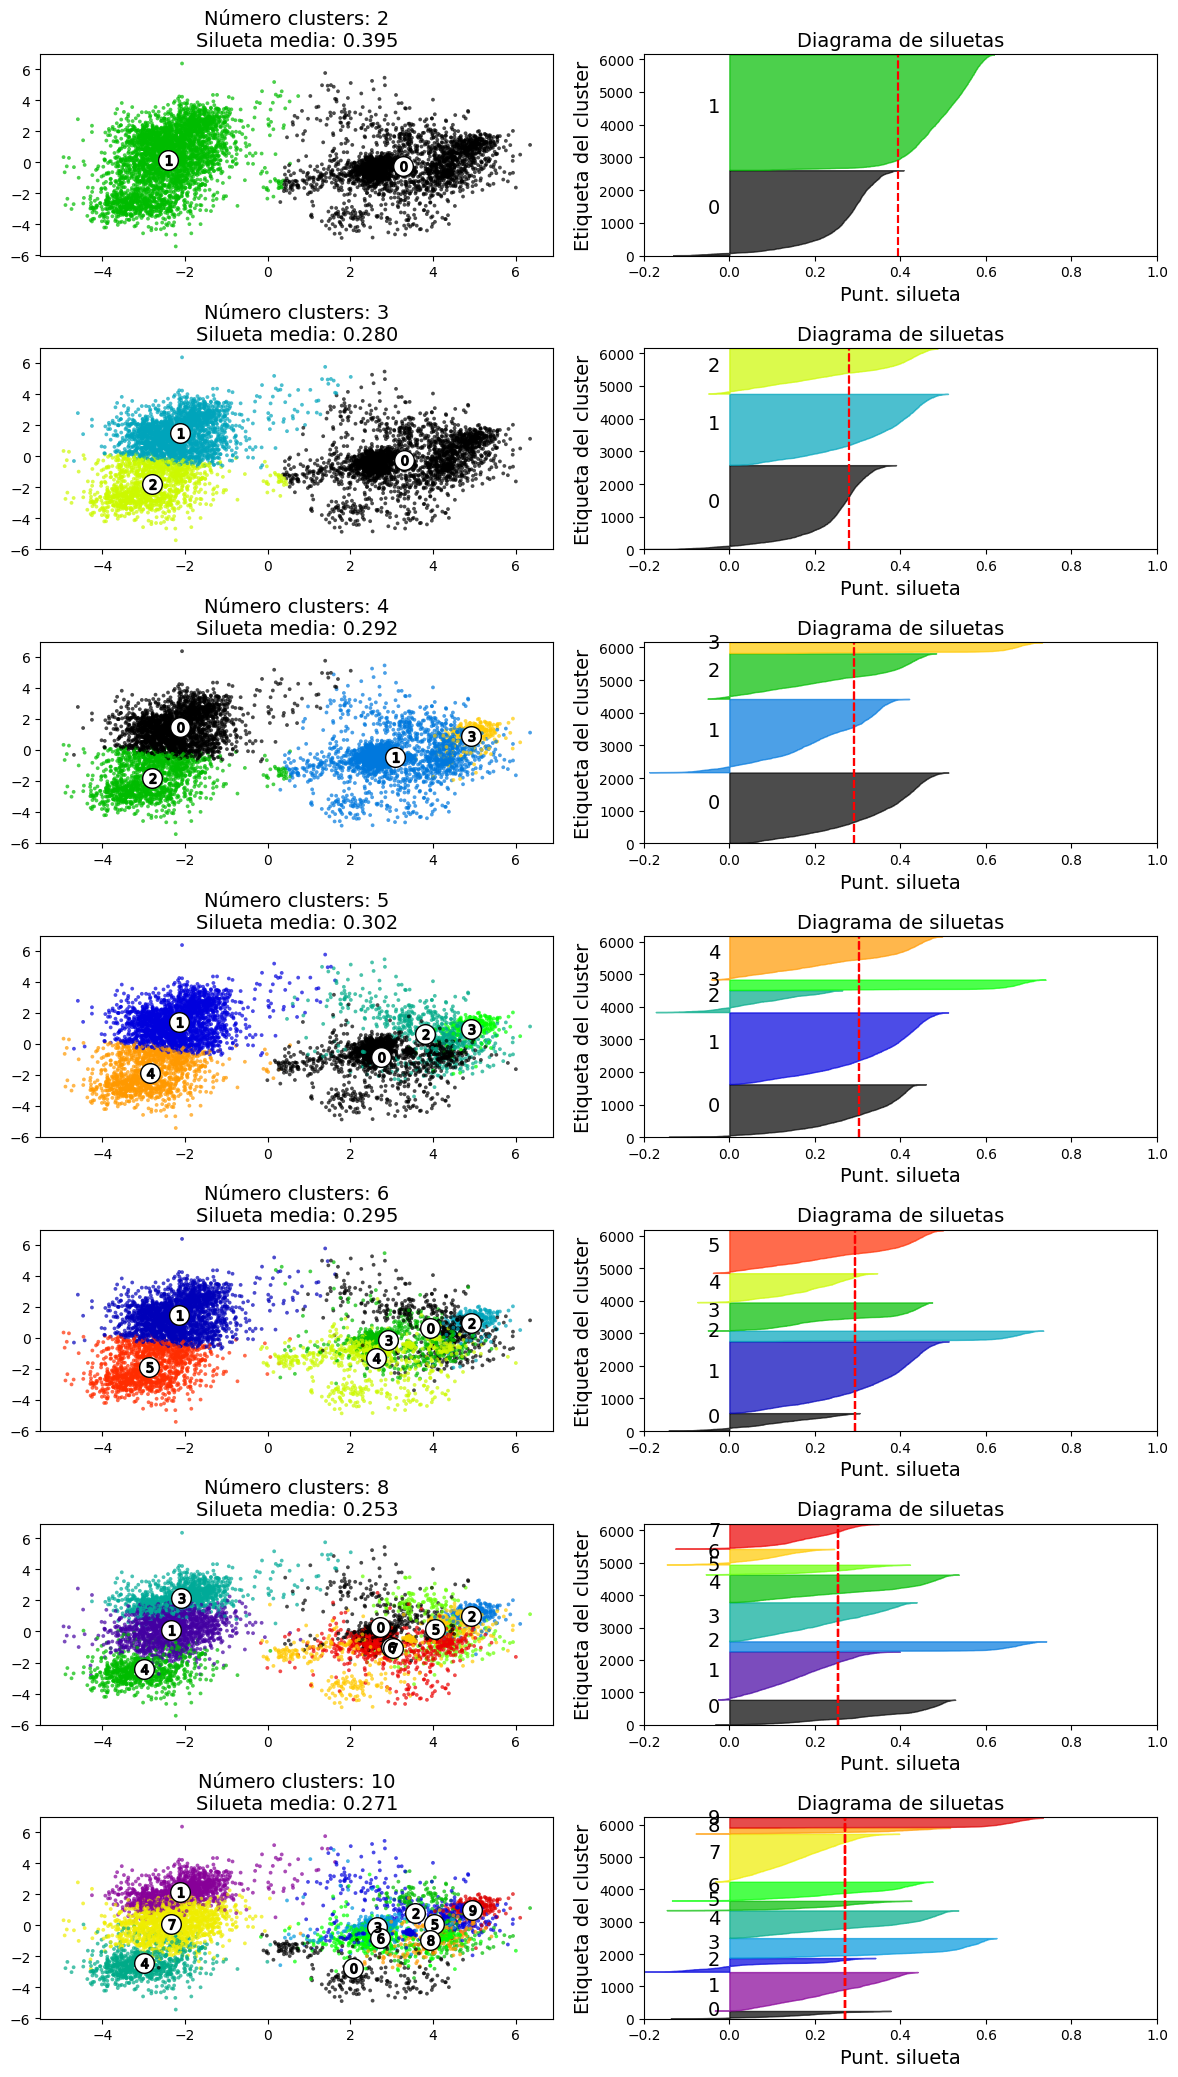

In [87]:
# buscamos k óptimo mediante diagrama de siluetas

plt.figure(figsize=(12, 21))
range_n_clusters = [2, 3, 4, 5, 6, 8, 10]
g = 0

for n_clusters in range_n_clusters:
  # por cada n_clusters, representamos 2 gráficas:

  # el primer gráfico muestra los límites de decisión encontrados, representando tb los centroides
  g = g+1
  ax = plt.subplot(len(range_n_clusters), 2, g)

  # creamos el clusterer, lo ajustamos y obtenemos las etiquetas predichas
  kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=50, algorithm='elkan')
  labels = kmeans.fit_predict(X_pca)

  # ponemos como título, el número de cluster y la puntuación de silueta media
  silueta_media = silhouette_score(X_pca, labels)
  plt.title("Número clusters: {}\nSilueta media: {:1.3f}".format(n_clusters, silueta_media))

  # representamos los puntos con los que se ha entrenado el modelo
  # los puntos de cada cluster van de un color diferente
  colors = cm.nipy_spectral(labels.astype(float) / n_clusters)
  ax.scatter(X_pca[:, 0], X_pca[:, 1], marker=".", s=30, linewidths=0, alpha=0.7, c=colors, edgecolor='k')

  # también representamos los centroides obtenidos por el modelo, numerados
  centers = kmeans.cluster_centers_
  ax.scatter(centers[:,0], centers[:,1], marker='o', c='white', alpha=1, s=200, edgecolor='k')
  for i, c in enumerate(centers):
    ax.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor='k')


  # el segundo gráfico es el diagrama de siluetas
  g = g+1
  ax = plt.subplot(len(range_n_clusters), 2, g)
  plt.xlim((-0.2, 1.0))
  plt.ylim((0, len(X_pca) + (n_clusters + 1)*10)) # para separar los datos de cada cluster

  # obtenemos la silueta de cada ejemplo
  silueta_ejemplos = silhouette_samples(X_pca, labels)

  y_lower = 10 # separación entre clusters en el eje y

  for i in range(n_clusters):
    # por cada cluster, obtenemos las siluetas de sus ejemplos ordenadas
    silueta_ejemplos_i = silueta_ejemplos[labels == i]
    silueta_ejemplos_i.sort()

    # calculamos el número de ejemplos que hay en cada cluster
    tam_cluster_i = silueta_ejemplos_i.shape[0]
    y_upper = y_lower + tam_cluster_i

    # relleno del cluster:
    # se rellena la región determinada por los intervalos [y_lower, y_upper] y [0, silueta_ejemplos_i]
    color = cm.nipy_spectral(float(i) /n_clusters)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        silueta_ejemplos_i,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    # ponemos las etiquetas de cada cluster al lado de su "cuchillo"
    # se corresponde con el número del centroide que aparece en el gráfico de los bordes de decisión
    ax.text(-0.05, y_lower + 0.5 * tam_cluster_i, str(i))

    # actualizamos valor de y_lower
    y_lower = y_upper + 10

    # establecemos los títulos de este segundo gráfico
    ax.set_title("Diagrama de siluetas")
    ax.set_xlabel("Punt. silueta")
    ax.set_ylabel("Etiqueta del cluster")

    # dibujamos la recta vertical x = silueta_media
    # este valor tb se incluye como títlulo en las gráficas de la izquierda
    ax.axvline(x=silueta_media, color='red', linestyle='--')

plt.tight_layout()

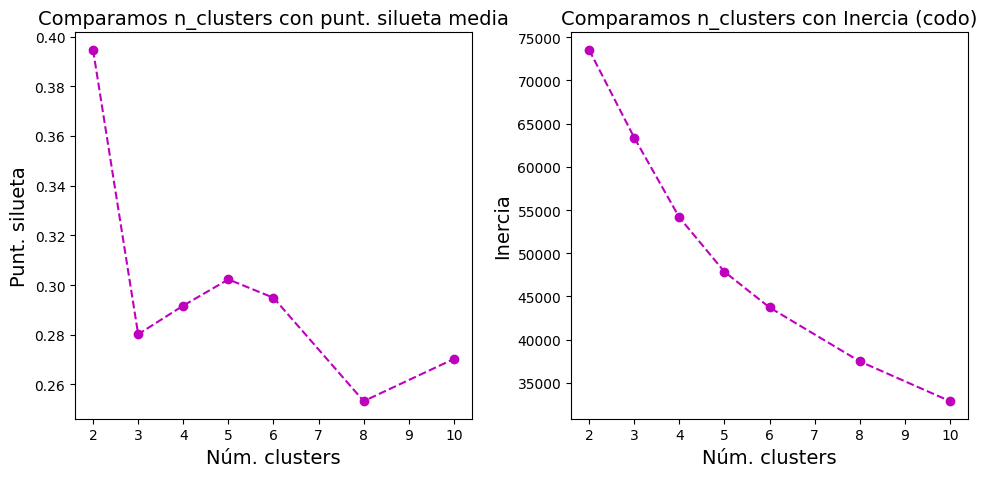

In [88]:
# compararmos modelos mediante inercia, silueta media y sus comparativas con n_clusters
n_clusters = [2, 3, 4, 5, 6, 8, 10]
j = 0
g = 0
plt.figure(figsize=(10, 5))

# creamos los 4 modelos para diferentes número de clusters
siluetas = []
inercia = []
for i in n_clusters:
  j = j+1
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init=50, algorithm='elkan')
  labels = kmeans.fit_predict(X_pca)
  siluetas.append(silhouette_score(X_pca, labels))
  inercia.append(kmeans.inertia_)

# imprimimos una gráfica para comparar núm clusters y silueta media
ax = plt.subplot(1, 2, 1)
plt.plot(n_clusters, siluetas, 'm--o')
plt.xlabel("Núm. clusters")
plt.ylabel("Punt. silueta")
plt.title("Comparamos n_clusters con punt. silueta media")

# imprimimos una segunda gráfica para comparar la inercia con el núm de clusters
g = g+1
ax = plt.subplot(1, 2, 2)
plt.plot(n_clusters, inercia, 'm--o')
plt.xlabel("Núm. clusters")
plt.ylabel("Inercia")
plt.title("Comparamos n_clusters con Inercia (codo)")

plt.tight_layout()
plt.show();

**Conclusiones con KMeans:**

Viendo las 2 últimas gráficas, el mejor valor de <b>silueta media</b> se encuentra con sólo 2 clusters y el "codo" lo intuimos en k=5, donde también hay un máximo local.

En relación a los <b>diagramas de fronteras de decisión</b> y <b>diagramas de silueta</b>, vemos cómo para k=8 y k=10, se obtienen clusters muy poco claros: "cuchillos" muy pequeños y heterogéneos entre sí. Es decir, en el clustering no se aprecia la división en géneros y especies de las ranas. En cuanto a k=4, sí podemos decir que hay 3 familias muy bien diferenciadas pero la cuarta (amarilla en los gráficos) no está tan bien definida por tratarse quizás de una forma no convexa que el kmeans no modela correctamente.

#####3.1 DBSCAN

In [89]:
# DBSCAN
# creamos 8 modelos para 8 valores de epsilon diferentes
eps = [1.0, 1.5, 2.0, 2.5, 3.5, 5]
plt.figure(figsize=(15, 10))
k = 0

for i in range(len(eps)):
  k = k+1
  # creamos y entrenamos el modelo
  dbscan = DBSCAN(eps=eps[i], min_samples=5, metric='euclidean').fit(X_pca)
  anom_rate = 100 * (len(np.argwhere(dbscan.labels_ == -1)) / (1.0*1000))

  # mostramos el número de core points, el número de clusters encontrados (sin contar el de las anomalías) y el núm de anomalías
  print("Modelo DBSCAN ", i)
  print("- Número de core points: ", dbscan.core_sample_indices_.shape[0])
  print("- Número de clusters:    ", len(np.unique(dbscan.labels_))-1)
  print("- Número de anomalías:   ", len(np.argwhere(dbscan.labels_ == -1)))
  print("- Porcentaje anomalías:  ", anom_rate)

Modelo DBSCAN  0
- Número de core points:  3137
- Número de clusters:     36
- Número de anomalías:    2150
- Porcentaje anomalías:   215.0
Modelo DBSCAN  1
- Número de core points:  5199
- Número de clusters:     20
- Número de anomalías:    617
- Porcentaje anomalías:   61.7
Modelo DBSCAN  2
- Número de core points:  5712
- Número de clusters:     16
- Número de anomalías:    256
- Porcentaje anomalías:   25.6
Modelo DBSCAN  3
- Número de core points:  5927
- Número de clusters:     5
- Número de anomalías:    107
- Porcentaje anomalías:   10.7
Modelo DBSCAN  4
- Número de core points:  6076
- Número de clusters:     4
- Número de anomalías:    15
- Porcentaje anomalías:   1.5
Modelo DBSCAN  5
- Número de core points:  6113
- Número de clusters:     1
- Número de anomalías:    2
- Porcentaje anomalías:   0.2


<Figure size 1500x1000 with 0 Axes>

**Conclusiones DBSCAN:**

En este caso, el algoritmo DBSCAN ha clusterizado el conjunto de datos muy bien en <b>2 grupos con sólo 0.2% de anomalías</b>. Y lo que nos interesa a nosotros: también lo ha clasificado en <b>4 grupos con 15% de anomalías</b>. Esto nos dice que el tipo de familia de la rana sí influye en el canto de las mismas.

## <font color='blue'>Ejercicio 3. DETECCIÓN de ANOMALÍAS con PyOD



### <font color='blue'> Ejemplo de uso de IsolationForest en un conjunto sintético.

<font color='blue'>A continuación, se muestra un ejemplo de uso de IsolationForest (https://pyod.readthedocs.io/en/latest/_modules/pyod/models/iforest.html) en un conjunto sintético. PyOD ofrece un wrapper del Isolation Forest de scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) con más funcionalidades.

#### <font color='blue'>Paso 1: Construimos el Modelo

<font color='blue'>Generamos $6$ variables y $500$ instancias para entrenamiento y test. Aunque los datos tienen la variable target $Y$, los modelos no supervisados solo usarán las variables $X$. La variable $Y$ es solo para validación. El porcentaje de outliers se pone al $5\%$ con `contamination=0.05`. Se dibuja un scatter plot de las dos primeras variables. Los puntos amarillos son outliers, y los puntos violeta son los datos normales.

In [91]:
!pip install pyod

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data
contamination = 0.05 # percentage of outliers
n_train = 500       # number of training points
n_test = 500        # number of testing points
n_features = 6      # number of features
X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train,
    n_test=n_test,
    n_features= n_features,
    contamination=contamination,
    random_state=123)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

0         1         2         3         4         5
0  2.396090  2.092611  2.073392  1.988262  1.953473  2.450997
1  1.631040  1.746182  1.898050  2.380148  1.967332  1.858916
2  1.824683  2.131412  2.028829  1.703454  2.502966  2.119108
3  2.106098  2.165173  2.340826  2.170109  1.749139  1.678661
4  1.829647  1.775596  1.829438  2.054768  1.577190  1.594549

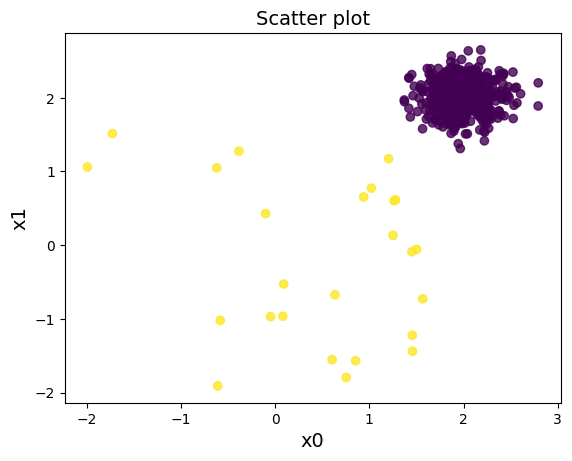

In [92]:
plt.scatter(X_train_pd[0], X_train_pd[1],c=y_train, alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

<font color='blue'>Declaramos y ajustamos el modelo. El tamaño de un árbol `max_samples`es de $40$ instancias. En Isolation Forest (IForest, https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.iforest), no es necesario asignar un tamaño de árbol grande, puesto que tamaños pequeños pueden producir mejores iTrees. El porcentaje de outliers será $5\%$ usando `contamination=0.05`. Si no se indica, este valor se fijará automáticamente en $10\%$.

<font color='blue'>La función `decision_function()` genera el _outlier score_ de cada ejemplo del conjunto de datos, y la función `predict()` assigna las etiquetas ($1$: outlier; $0$: no outlier) basándose en la tasa de contaminación proporcionada ($5\%$ en nuestro caso). El umbral que vemos más abajo (`threshold_`) se emplea para identificar los `n_samples*contamination` ejemplos más atípicos de acuerdo a su `decision_scores_`.

In [93]:
from pyod.models.iforest import IForest
isft = IForest(contamination=0.05, max_samples=40, behaviour='new')
isft.fit(X_train)

# Training data
y_train_scores = isft.decision_function(X_train)
y_train_pred = isft.predict(X_train)

# Test data
y_test_scores = isft.decision_function(X_test)
y_test_pred = isft.predict(X_test) # outlier labels (0 or 1)

# Threshold for the defined contamination rate
print("The threshold for the defined contamination rate:" , isft.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))


The threshold for the defined contamination rate: -5.480858822348722e-15
The training data: {0: 475, 1: 25}
The training data: {0: 475, 1: 25}


<font color='blue'> Vemos que, efectivamente, este número de ejemplos más atípicos se corresponde con `X_train.shape[0]*0.05`.

In [94]:
X_train.shape[0]*0.05

25.0

<font color='blue'> Vamos a intentar marcar con una cruz roja los $25$ ejemplos más atípicos en la figura.  

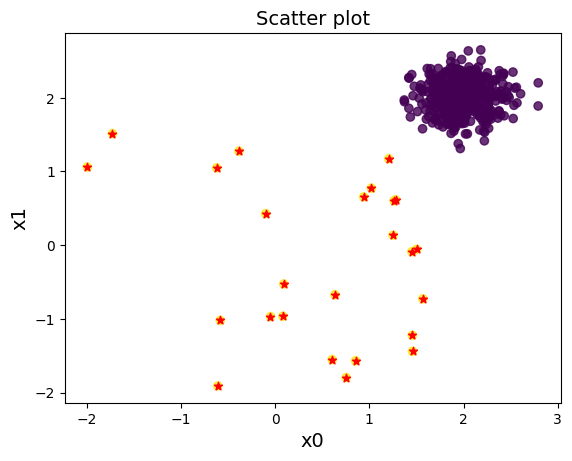

In [95]:
plt.scatter(X_train_pd[0], X_train_pd[1],c=y_train, alpha=0.8)
indexes = np.squeeze(np.array(np.where(isft.threshold_ < isft.decision_scores_)))
plt.scatter(X_train[indexes,0], X_train[indexes,1],marker='*',color='r')
plt.title('Scatter plot')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

##### <font color='blue'>Paso 1.1: Parámetros del Modelo

In [96]:
isft.get_params()

{'behaviour': 'new',
 'bootstrap': False,
 'contamination': 0.05,
 'max_features': 1.0,
 'max_samples': 40,
 'n_estimators': 100,
 'n_jobs': 1,
 'random_state': None,
 'verbose': 0}

* <font color='blue'>`max_samples` es el número de muestras a escoger en $X$ para entrenar cada estimador base.
* <font color='blue'>`n_estimators` es el número de árboles en el ensemble. El valor por defecto es de 100 árboles.
* <font color='blue'>`max_features` es el número de características a escoger en $X$ para entrenar cada estimador base. El valor por defecto es $1.0$.
* <font color='blue'>`n_jobs` es el número de tareas a ejecutar en paralelo para `fit`y `predict`. El valor por defecto es $1.0$. Si se pone a $-1$, el número de tareas se iguala al número de cores.

##### <font color='blue'>Paso 1.2: Importancia de las Variables

<font color='blue'>Debido a que IForest trabaja dentro del marco de los árboles de decisión, podemos calcular y entender la importancia relativa de las características para determinar outliers. La importancia de las características se mide por el [índice de impureza Gini](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity), cuya suma es $1.0$. A mayor valor, mayor importancia tiene la característica. En nuestro caso, la segunda (índice $1$) y quinta (índice $4$) características serían las más relevantes.

In [97]:
isft_vi = isft.feature_importances_
isft_vi

array([0.15102063, 0.17432663, 0.15948322, 0.16349687, 0.17510565,
       0.17656701])

In [98]:
np.sum(isft_vi)

1.0

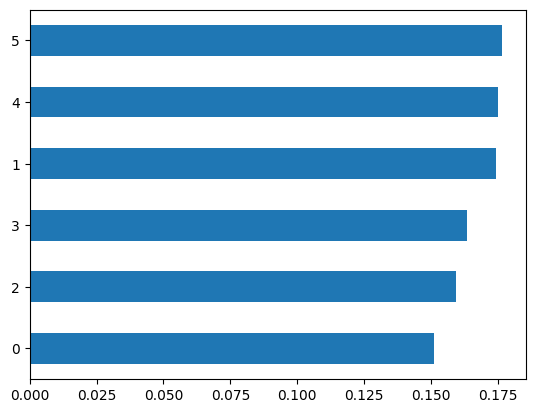

In [99]:
from matplotlib import pyplot as plt
for_plot = pd.DataFrame({'x_axis':X_train_pd.columns, 'y_axis':isft_vi}).sort_values(by='y_axis',ascending=True)
for_plot['y_axis'].plot.barh();

####<font color='blue'> Paso 2: Determinar un Umbral Razonable

<font color='blue'>El umbral se puede determinar por el histograma de los _outlier scores_. La siguiente figura sugiere un umbral alrededor de $0.0$. Esto significa que los scores de la mayoría de los datos normales son menores que $0.0$. Los scores de outlier de los datos anormales están en un rango más alto.

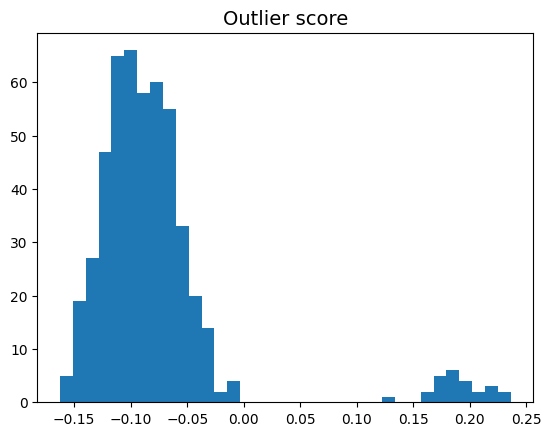

In [100]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

#### <font color='blue'>Paso 3: análisis estadístico descriptivo

<font color='blue'>Realicemos un análisis descriptivo de los grupos normal y outlier tanto en entrenamiento como en test. En esta ocasión utilizamos directamente el threshold calculado por Isolation Forest, pero debemos ser conscientes de que podemos emplear el valor que consideremos más oportuno (en base al histograma anterior o a cualquier otra información de que dispongamos). Dicho umbral hará que cambien las tablas que se muestran a continuación. Por ejemplo, si hacemos `threshold = isft.threshold_ - 0.05` veremos que se incrementa el porcentaje de ejemplos considerados outliers (pasando del $5\%$ al $11.2\%$).

In [101]:
print(isft.threshold_)

-5.480858822348722e-15


In [102]:
threshold = isft.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(3).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold) #y_train_scores = isft.decision_scores_

Group  Count  Count %      0      1      2      3      4      5  \
0   Normal    475     95.0  2.003  2.011  2.006  1.991  2.008  1.985   
1  Outlier     25      5.0  0.454 -0.209 -0.475 -0.231 -0.035 -0.056   

   Anomaly_Score  
0         -0.091  
1          0.190

In [103]:
descriptive_stat_threshold(X_test,y_test_scores, threshold)

Group  Count  Count %      0      1     2      3      4      5  \
0   Normal    475     95.0  2.016  2.014  2.01  1.988  2.006  2.001   
1  Outlier     25      5.0  0.000 -0.540 -0.23 -0.052 -0.056  0.119   

   Anomaly_Score  
0         -0.090  
1          0.196

In [104]:
X_train[y_train==1,0].mean()

0.4535480626515198

<font color='blue'>Las tablas de arriba incluyen los elementos esenciales para la evaluación del modelo e interpretación de resultados.

* <font color='blue'>Tamaño del grupo de outlier (`Count %`) de las tablas. Muestra un $5\%$ en cada caso ($5.2\%$ en test). Es importante recordar que el tamaño del grupo de outliers viene determinado por el threshold, que a su vez se calcula en base a la contaminación proporcionada.
* <font color='blue'>La media del score de anomalía. En las tablas, la media del score del grupo de outlier es más grande que la del grupo normal, lo que confirma que el grupo  outlier debería tener y tiene mayores scores de anomalía.
* <font color='blue'>Estadísticas relativas a las variable de entrada agrupadas en normales (grupo $0$) y atípicas (grupo $1$). Por ejemplo, el valor asociado con la columna $0$ y fila $0$ (normal) se corresponde con `X_train[y_train==0,0].mean()`, es decir, $2.003$. La segunda fila (grupo $1$) de la misma columna sería `X_train[y_train==1,0].mean()`, es decir, $0.454$. Se puede observar que la media de las características en el grupo de outliers son más pequeñas que en el grupo de ejemplos normales. Si esto tiene sentido o no depende del problema en cuestión.


<font color='blue'>Debido a que tenemos el ground truth en nuestros datos, podemos generar una matriz de confusión para entender el rendimiento del modelo.

In [105]:
def confusion_matrix_threshold(
    actual,score, threshold):
    Actual_pred = pd.DataFrame({'Actual': actual, 'Pred': score})
    Actual_pred['Pred'] = np.where(Actual_pred['Pred']<=threshold,0,1)
    cm = pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])
    return (cm)

confusion_matrix_threshold(y_train,y_train_scores,threshold)

Pred      0   1
Actual         
0.0     475   0
1.0       0  25

### <font color='blue'>Ejercicio.

<font color='blue'>Tras el ejemplo anterior, ahora presentamos el ejercicio a resolver por el alumnado en relación a la detección de anomalías con PyOD (https://pyod.readthedocs.io/en/latest/). En concreto, los estudiantes trabajarán con el conjunto de datos _Statlog_ (satélite Landsat) del repositorio de aprendizaje automático de la UCI (https://odds.cs.stonybrook.edu/satellite-dataset/). Se trata de un conjunto de datos de clasificación multiclase, en donde se combinan las tres clases más pequeñas para formar la clase de valores atípicos. En PRADO el alumnado dispone del fichero `satellite.mat` con los datos necesarios para realizar el ejercicio. A continuación se aporta una descripción general del dataset:
* <font color='blue'> $X$ = datos puntuales multidimensionales,
* <font color='blue'> $y$ = etiquetas ($1$ = valores atípicos, $0$ = valores normales).
* <font color='blue'> $6435$ instancias, $36$ características y $2036$ ($32\%$) anomalías. Este último número se puede recuperar haciendo `np.sum(Y==1)`.

<font color='blue'> Referencias:
* <font color='blue'>  Liu, Fei Tony, Kai Ming Ting, and Zhi-Hua Zhou. “Isolation forest.” 2008 Eighth IEEE International Conference on Data Mining. IEEE, 2008.
* <font color='blue'>  K. M. Ting, J. T. S. Chuan, and F. T. Liu. “Mass: A New Ranking Measure for Anomaly Detection.“, IEEE Transactions on Knowledge and Data Engineering, 2009.




## <font color='blue'> Objetivos
    
<font color='blue'> El objetivo del presente ejercicio es analizar los patrones subyacentes a los datos, sin tomar en cuenta su _ground truth_, y determinar si las anomalías que se detectan con algoritmos avanzados coinciden con la realidad. Se debe usar un algoritmo cualquiera de la librería PyOD (https://github.com/yzhao062/pyod), como podría ser Isolation Forest. Se valorará positivamente que el estudiante escoga un algoritmo diferente, en cuyo caso, se proporcionará una breve explicación de su funcionamiento.

<font color='blue'> Para llevar a cabo este objetivo principal se llevarán a cabo los siguientes objetivos secundarios:
1. <font color='blue'> Realización de un análisis exploratorio para una primera observación de las distribuciones de los datos.
2. Construcción y ajuste del modelo.
3. Experimentación y determinación de los umbrales más razonables para la identificación de anomalías.
4. Comprobación de errores usando la información Ground Truth del conjunto de datos.

### <font color='blue'> Resultados Esperados
<font color='blue'> Se espera que los resultados que se obtengan de la detección de anomalías sean razonablemente parecidos a la realidad.
    
<font color='blue'>Como el fichero es un `.mat` (matlab), lo primero que haremos será tranformarlo en `.csv` para trabajar con él. Nos quedamos solo con la parte no supervisada (es decir, con las entradas, sin las salidas deseadas / etiquetas).

In [106]:
import scipy.io
import pandas as pd

from google.colab import drive
drive.mount("/content/drive/")

dataFolder = 'drive/MyDrive/Colab Notebooks/clustering/'

# Cargar el archivo .mat
mat = scipy.io.loadmat(dataFolder + '/satellite.mat')
print(mat.keys())

X = mat['X']
Y = mat['y']

# Convertir a un DataFrame de pandas ignorando las etiquetas
# IMPORTANTE: estamos ante un problema no supervisado. No podemos emplear las etiquetas para agrupar o analizar los datos.
df = pd.DataFrame(X)
y = pd.DataFrame(Y)

df.head() # primero 5 ejemplos del conjunto de datos

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


0    1    2   3   4    5    6   7   8    9   ...   26   27  28   29   30  \
0  92  115  120  94  84  102  106  79  84  102  ...  134  104  88  121  128   
1  84  102  106  79  84  102  102  83  80  102  ...  128  100  84  107  113   
2  84  102  102  83  80  102  102  79  84   94  ...  113   87  84   99  104   
3  80  102  102  79  84   94  102  79  80   94  ...  104   79  84   99  104   
4  84   94  102  79  80   94   98  76  80  102  ...  104   79  84  103  104   

    31  32   33   34  35  
0  100  84  107  113  87  
1   87  84   99  104  79  
2   79  84   99  104  79  
3   79  84  103  104  79  
4   79  79  107  109  87  

[5 rows x 36 columns]

####**1. Análisis exploratorio de los datos**



In [107]:
df.describe() # resumen de estadísticos sobre el conjunto de datos

0            1            2            3            4   \
count  6435.000000  6435.000000  6435.000000  6435.000000  6435.000000   
mean     69.400000    83.594872    99.290598    82.592696    69.150272   
std      13.605871    22.882234    16.645944    18.897674    13.561197   
min      39.000000    27.000000    53.000000    33.000000    39.000000   
25%      60.000000    71.000000    85.000000    69.000000    60.000000   
50%      68.000000    87.000000   101.000000    81.000000    68.000000   
75%      80.000000   103.000000   113.000000    92.000000    80.000000   
max     104.000000   137.000000   140.000000   154.000000   104.000000   

                5            6            7            8            9   ...  \
count  6435.000000  6435.000000  6435.000000  6435.000000  6435.000000  ...   
mean     83.243512    99.110645    82.497125    68.912354    82.893085  ...   
std      22.886495    16.664088    18.940923    13.470599    22.862255  ...   
min      27.000000    50.000000    29.000000    40.000000    27.000000  ...   
25%      71.000000    85.000000    69.000000    60.000000    71.000000  ...   
50%      85.000000   101.000000    81.000000    67.000000    85.000000  ...   
75%     103.000000   113.000000    92.000000    79.000000   102.000000  ...   
max     137.000000   145.000000   157.000000   104.000000   130.000000  ...   

                26           27           28           29           30  \
count  6435.000000  6435.000000  6435.000000  6435.000000  6435.000000   
mean     99.214763    82.660606    68.944056    83.145610    99.111888   
std      16.612514    18.991281    13.492684    22.847199    16.704305   
min      50.000000    29.000000    39.000000    27.000000    50.000000   
25%      85.000000    69.000000    60.000000    71.000000    85.000000   
50%     100.000000    81.000000    68.000000    85.000000   100.000000   
75%     113.000000    92.000000    79.000000   103.000000   113.000000   
max     140.000000   154.000000   104.000000   130.000000   145.000000   

                31           32           33           34           35  
count  6435.000000  6435.000000  6435.000000  6435.000000  6435.000000  
mean     82.618026    68.727584    82.858897    98.926030    82.505361  
std      19.043661    13.401603    22.816959    16.695488    19.054274  
min      29.000000    39.000000    27.000000    50.000000    29.000000  
25%      69.000000    60.000000    71.000000    85.000000    68.000000  
50%      81.000000    67.000000    84.000000   100.000000    81.000000  
75%      92.000000    79.000000   103.000000   113.000000    92.000000  
max     157.000000   104.000000   130.000000   145.000000   157.000000  

[8 rows x 36 columns]

A continuación, mostramos los <b>histogramas</b> de cada característica (36 en total). Observamos que todos los atributos tienen el mismo dominio, el intervalo (0, 150) y toman valores entre (0, 800) siguiendo distribuciones normales de media 75 o 100. Además, <b>podemos observar desde ya ciertos conjuntos de anomalías</b> que aparecen a la derecha de las normales en algunas caracteríscas, como la 3, 7, 11 o 15; y también se obtienen valores inusualmente altos en la cola izquierda de la campana de otros atributos como el 17, 21, 25 o 33.

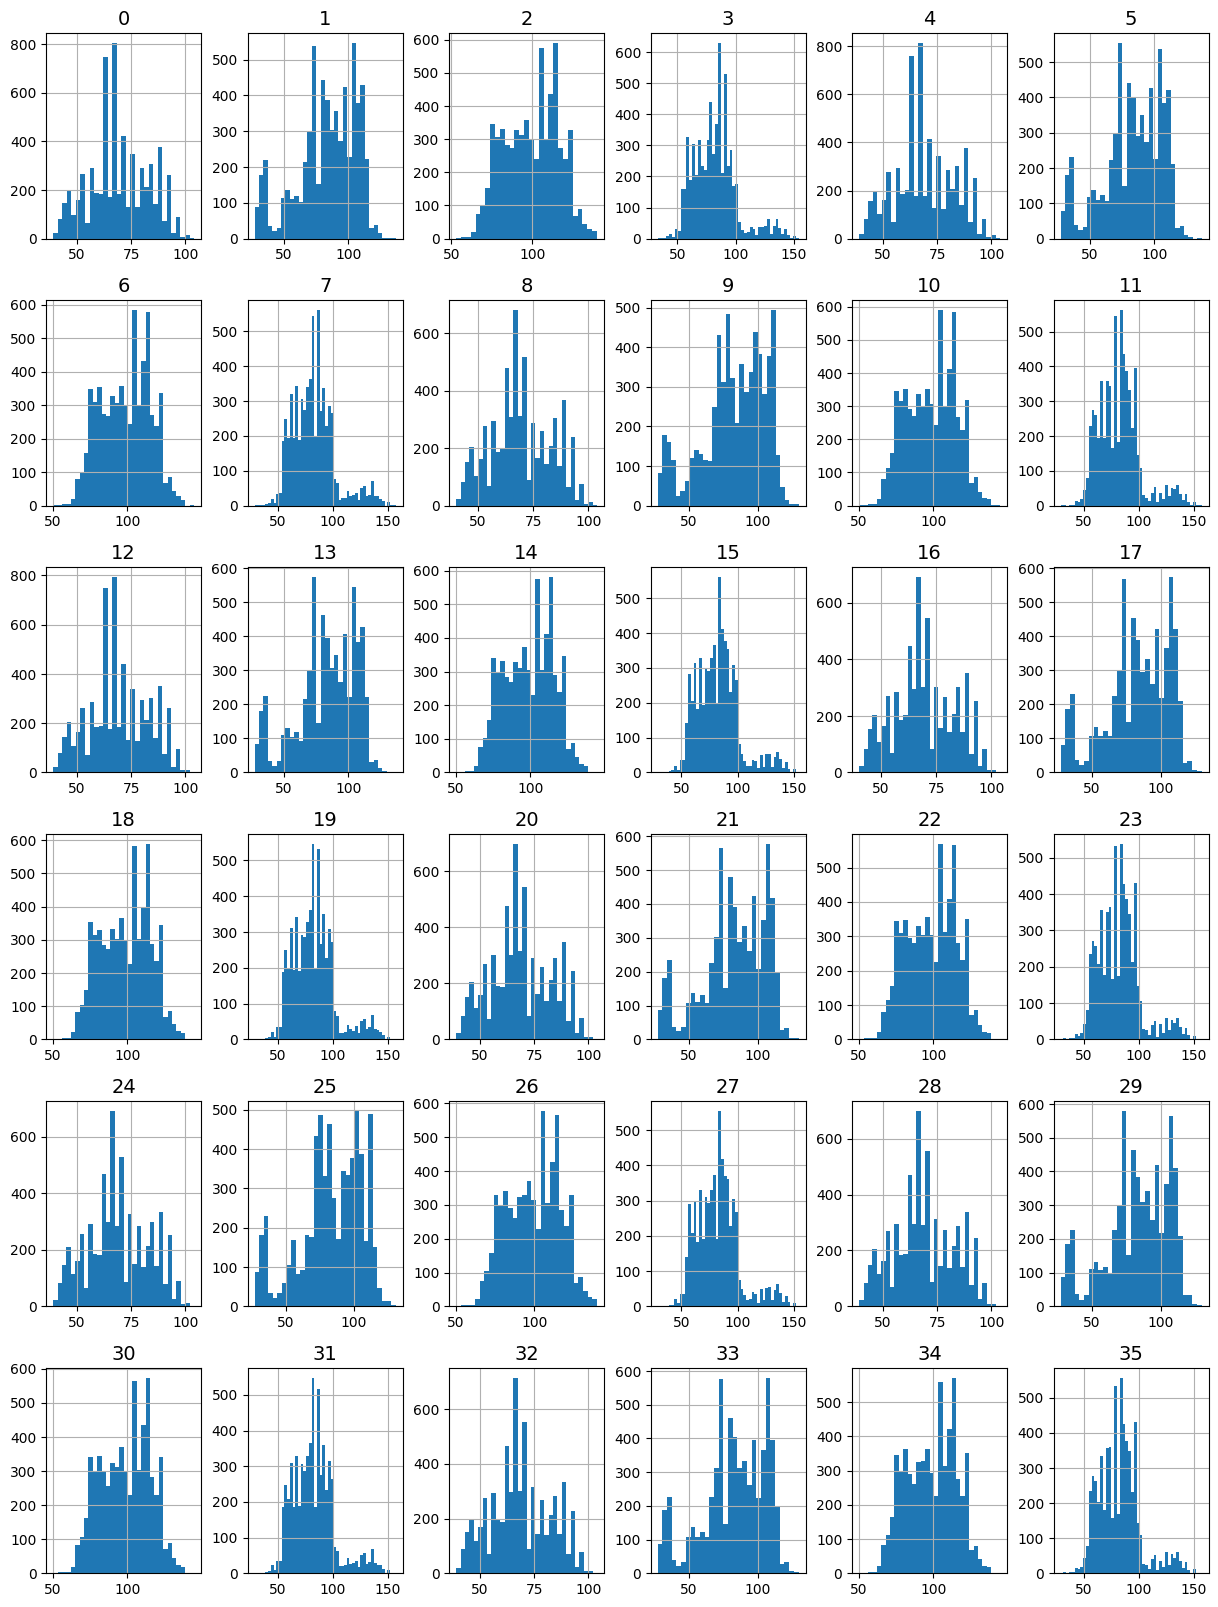

In [108]:
df.hist(bins='auto', figsize=(15,20));

Estos 2 tipos de anomalía los voy a llamar <b>"Anomalía derecha"</b> y <b>"Anomalía izquierda"</b>. En las siguientes gráficas trato de representarlas mediante <b>scatter plots</b>. En las 2 de arriba se están comparando la característica 0, que sigue un comportamiento normal ideal, con los atributos 15 y 31, que tienen una zona aparentemente anómala en la cola derecha de la campana. Efectivamente, podemos intuir que la nube pequeña que se forma arriba es una anomalía. Del mismo modo, en las 2 gráficas de abajo se está comparando la característica 0 con los atributos 9 y 33, los cuales tienen previsiblemente puntos anómalos en la cola izquierda de las normales. En ellas, quizás en la esquina izquierda inferior se estén concentrando algunas anomalías.

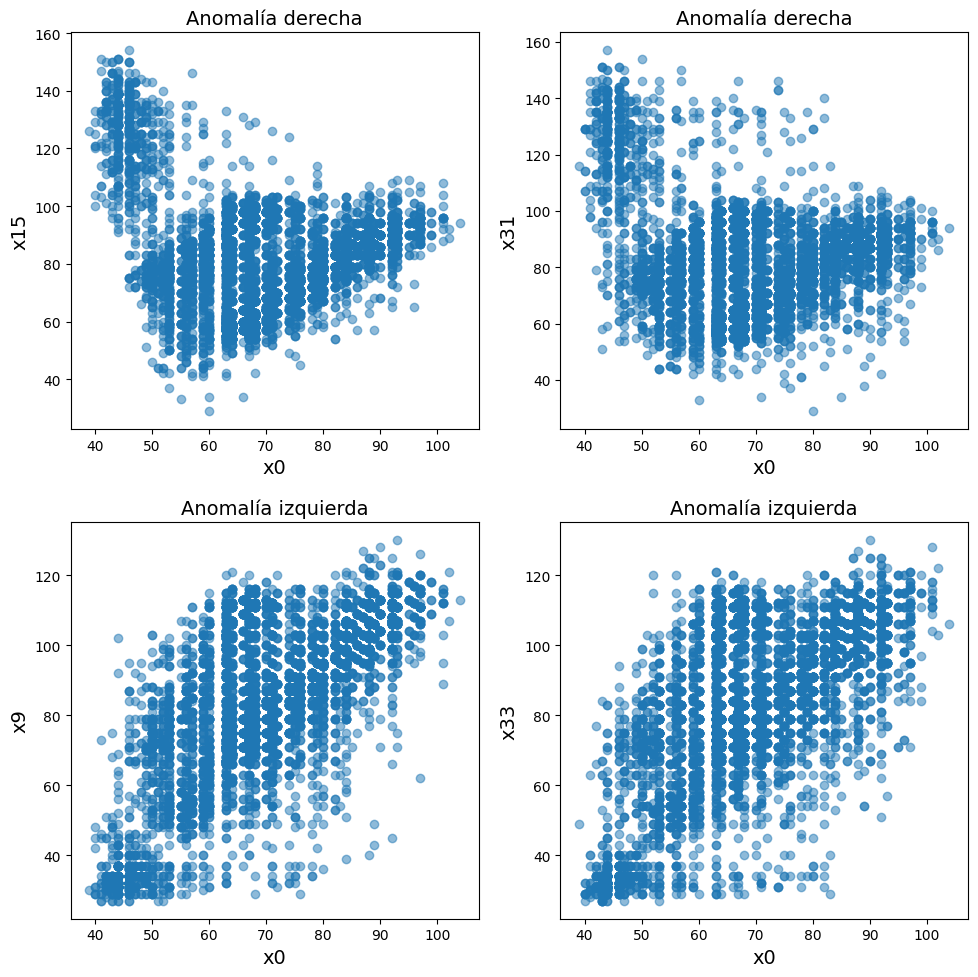

In [109]:
# representamos varias gráficas para observar las 2 formas de anomalía encontradas presuntamente
plt.figure(figsize=(10, 10))

ax = plt.subplot(2, 2, 1)
plt.scatter(df[0], df[15], alpha=0.5)
plt.title('Anomalía derecha')
plt.xlabel('x0')
plt.ylabel('x15')

ax = plt.subplot(2, 2, 2)
plt.scatter(df[0], df[31], alpha=0.5)
plt.title('Anomalía derecha')
plt.xlabel('x0')
plt.ylabel('x31')

ax = plt.subplot(2, 2, 3)
plt.scatter(df[0], df[9], alpha=0.5)
plt.title('Anomalía izquierda')
plt.xlabel('x0')
plt.ylabel('x9')

ax = plt.subplot(2, 2, 4)
plt.scatter(df[0], df[33], alpha=0.5)
plt.title('Anomalía izquierda')
plt.xlabel('x0')
plt.ylabel('x33')

plt.tight_layout()
plt.show()

####**2. Construcción y ajuste del modelo**

Una vez hecho el análisis exploratorio de los datos, pasamos a la construcción del modelo de aprendizaje no supervisado. Voy a usar el método <b>Local Oulier Factor (LOF)</b>, el cual compara la densidad local de una instancia con la de sus vecinos para detectar valores atípicos. La densidad local de una instancia se estima midiendo la distancia a los k vecinos más cercanos (k representa el parámetro <b>n_neighbors</b> del método). Si la densidad local de un ejemplo es significativamente menor que la de sus vecinos, se considera un valor anómalo.

La forma de calcular los vecinos más cercanos es otro parámetro del método LOF, llamado <b>algorithm</b>. Los posibles algoritmos que incluye son: <i>'brute'</i>, que implementa una técnica de fuerza bruta del orden de $O(DN²)$, con $D$ número de características y $N$ número de ejemplos; <i>'kd_tree'</i>, introduce estructuras de árbol para aumentar la eficiencia a $O(log(N))$; y <i>'ball_tree'</i>, otro algoritmo basado en árboles más costoso que el anterior pero más eficiente para conjuntos de datos más extensos. Con la opción de <i>'auto'</i> scikit-learn selecciona el algoritmo más apropiado según los datos pasados.

Con el parámetro <b>contamination</b> le podemos pasar la proporción de outliers que hay en el conjunto de datos (32%), pero como este dato estamos suponiendo que no lo conocemos a priori, no lo indicamos. En este caso, por defecto se estsablece <i>contamination='auto'</i>.


In [110]:
# creamos el modelo LOF

from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10, algorithm='auto', contamination='auto')
print(lof.get_params())

{'algorithm': 'auto', 'contamination': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'novelty': False, 'p': 2}


In [111]:
# entrenamos el modelo y predecimos outliers sobre los datos de entrenamiento

is_inlier = lof.fit_predict(df) # -1: outliers, 1: inliers
print(is_inlier.shape)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(is_inlier))

(6435,)
The training data: {-1: 94, 1: 6341}


Ahora mismo obtenemos sólo 94 valores anómalos, cuando deberían serlo 2036. Nos queda ajustar mejor el modelo, en concreto, debemos <b>determinar el umbral que diferencia un outlier de un inlier</b>.  Así, también determinaremos el porcentaje de contamination concreto que debemos pasarle al modelo LOF.

####**3. Determinación del umbral**

In [112]:
# el atributo negative_outlier_factor_ nos da un vector con el LOF negativo para cada instancia. Más alto, más normal
neg_lof = lof.negative_outlier_factor_
print(neg_lof)

[-1.43740921 -1.17847594 -1.03045352 ... -1.15010646 -1.50117538
 -1.13129643]


In [113]:
ordered_samples = np.argsort(neg_lof)
min = neg_lof[1958]
max = neg_lof[ordered_samples[-1]]
print(min)   # más outlier
print(max)   # más normal

-1.935500426337649
-0.9588078909555179


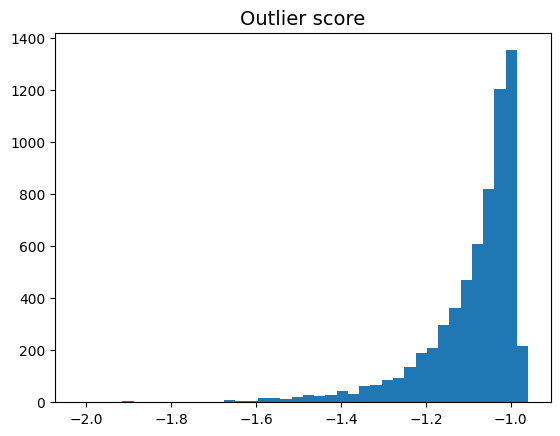

In [114]:
plt.hist(neg_lof, bins=40) # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

Extraemos de la gráfica que <b>el umbral es poco más de -1.0</b>, aunque no está muy claro. Tomamos -1,022 y llamamos a la función del ejemplo anterior que nos muestra ciertos estadísticos sobre las anomalías. Ahora sí llegamos a contar el 32% de anomalías y el resto ejemplos normales.

In [115]:
threshold = -1.022
descriptive_stat_threshold(df, neg_lof, threshold)

Group  Count    Count %       0       1       2       3       4       5  \
0   Normal   4352  67.630148  69.975  83.635  98.954  82.332  69.684  83.254   
1  Outlier   2083  32.369852  68.199  83.511  99.995  83.137  68.035  83.221   

        6  ...      27      28      29       30      31      32      33  \
0  98.816  ...  82.111  69.531  83.282   98.595  82.119  69.250  82.915   
1  99.726  ...  83.808  67.717  82.860  100.192  83.661  67.637  82.741   

       34      35  Anomaly_Score  
0  98.431  82.064         -1.134  
1  99.961  83.428         -1.002  

[2 rows x 40 columns]

####**4. Comprobación de errores usando ground truth**

Ahora sí podemos usar las etiquetas extraídas de los datos en el objeto <i>y</i>. Este objeto es de tipo DataFrame y tiene un 0 por cada ejemplo que es inlier y un 1 por cada instancia anómala.

In [116]:
# mostramos el objeto y
print(type(y))
print(y.shape)
print(y)

<class 'pandas.core.frame.DataFrame'>
(6435, 1)
      0
0     0
1     0
2     0
3     0
4     0
...  ..
6430  0
6431  0
6432  1
6433  1
6434  1

[6435 rows x 1 columns]


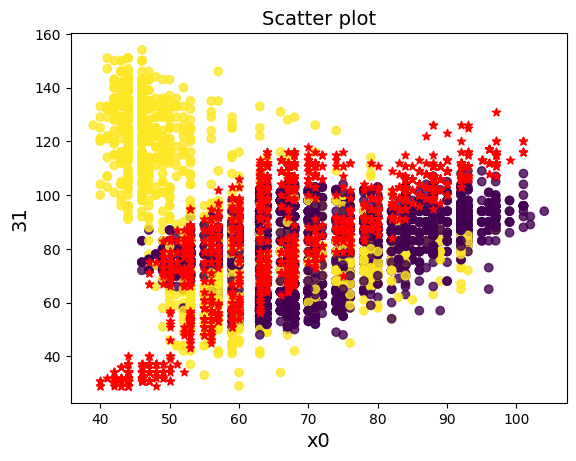

In [118]:
# representamos con estrellitas rojas las anomalías

plt.scatter(df[0], df[15],c=y, alpha=0.8)
indexes = np.squeeze(np.array(np.where(threshold < neg_lof)))
df_filtrado = df.iloc[indexes]
plt.scatter(df_filtrado[0], df_filtrado[1], marker='*', color='r')
plt.title('Scatter plot')
plt.xlabel('x0')
plt.ylabel('31')
plt.show()

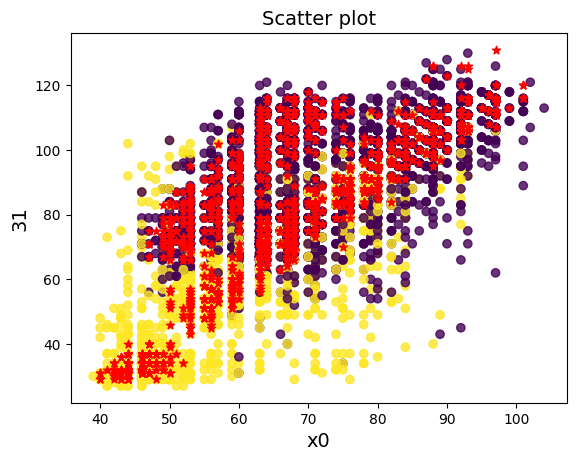

In [119]:
plt.scatter(df[0], df[9],c=y, alpha=0.8)
indexes = np.squeeze(np.array(np.where(threshold < neg_lof)))
df_filtrado = df.iloc[indexes]
plt.scatter(df_filtrado[0], df_filtrado[1], marker='*', color='r')
plt.title('Scatter plot')
plt.xlabel('x0')
plt.ylabel('31')
plt.show()